## Sprint 1: EDA on Predicting Mushroom Toxicity Dataset

#### Submitted by: Simona Sklenar 

##### Preliminaries

In [1]:
# Importing libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display

In [2]:
# Importing the data: 

df = pd.read_csv('C:/Users/simon/Python_2024/Mushroom_Cap_2024.csv')

### Data Inspection

In [3]:
# Checking the shape:

print(df.shape)

(8124, 22)


In [4]:
# Checking the head:

df.head()

,cap_shape,cap_surface,cap_color,has_bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,number_of_rings,ring_type,spore_print_color,population,habitat,is_poisonous
0,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,o,pendant,black,scattered,urban,1
1,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,...,white,white,partial,white,o,pendant,brown,numerous,grasses,0
2,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,o,pendant,brown,numerous,meadows,0
3,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,o,pendant,black,scattered,urban,1
4,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,...,white,white,partial,white,o,evanescent,brown,abundant,grasses,0


In [5]:
# Checking variable data types:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   cap_shape                  8124 non-null   object
 1   cap_surface                8124 non-null   object
 2   cap_color                  8124 non-null   object
 3   has_bruises                8124 non-null   bool  
 4   odor                       8124 non-null   object
 5   gill_attachment            8124 non-null   object
 6   gill_spacing               8124 non-null   object
 7   gill_size                  8124 non-null   object
 8   gill_color                 8124 non-null   object
 9   stalk_shape                8124 non-null   object
 10  stalk_surface_above_ring   8124 non-null   object
 11  stalk_surface_belows_ring  8124 non-null   object
 12  stalk_color_above_ring     8124 non-null   object
 13  stalk_color_below_ring     8124 non-null   object
 14  veil_typ

In [6]:
# Checking for null values:

null_values = df.isnull().sum()
print(null_values)

cap_shape                    0
cap_surface                  0
cap_color                    0
has_bruises                  0
odor                         0
gill_attachment              0
gill_spacing                 0
gill_size                    0
gill_color                   0
stalk_shape                  0
stalk_surface_above_ring     0
stalk_surface_belows_ring    0
stalk_color_above_ring       0
stalk_color_below_ring       0
veil_type                    0
veil_color                   0
number_of_rings              0
ring_type                    0
spore_print_color            0
population                   0
habitat                      0
is_poisonous                 0
dtype: int64


In [7]:
# Checking for duplicate rows:

duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: Empty DataFrame
Columns: [cap_shape, cap_surface, cap_color, has_bruises, odor, gill_attachment, gill_spacing, gill_size, gill_color, stalk_shape, stalk_surface_above_ring, stalk_surface_belows_ring, stalk_color_above_ring, stalk_color_below_ring, veil_type, veil_color, number_of_rings, ring_type, spore_print_color, population, habitat, is_poisonous]
Index: []

[0 rows x 22 columns]


In [8]:
# Checking unique values in each column:

for column in df.columns:
    print(column, df[column].unique())

cap_shape ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
cap_surface ['smooth' 'scaly' 'fibrous' 'grooves']
cap_color ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
has_bruises [ True False]
odor ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
gill_attachment ['free' 'attached']
gill_spacing ['close' 'crowded']
gill_size ['narrow' 'broad']
gill_color ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
stalk_shape ['enlarging' 'tapering']
stalk_surface_above_ring ['smooth' 'fibrous' 'silky' 'scaly']
stalk_surface_belows_ring ['s' 'f' 'y' 'k']
stalk_color_above_ring ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']
stalk_color_below_ring ['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']
veil_type ['partial']
veil_color ['white' 'brown' 'orange' 'yellow']
number_of_rings ['o' 't' 'n']
ring_type ['pendant' 'evanescent' 'l

### Univariate Analysis 

##### Data visualization

In this section, we will be looking at distributions of each individual variable and examining the proportion of occurrences of the classes for each value of each independent variable. The purpose of this is to determince any biases and imbalances. 

##### 1. cap_shape

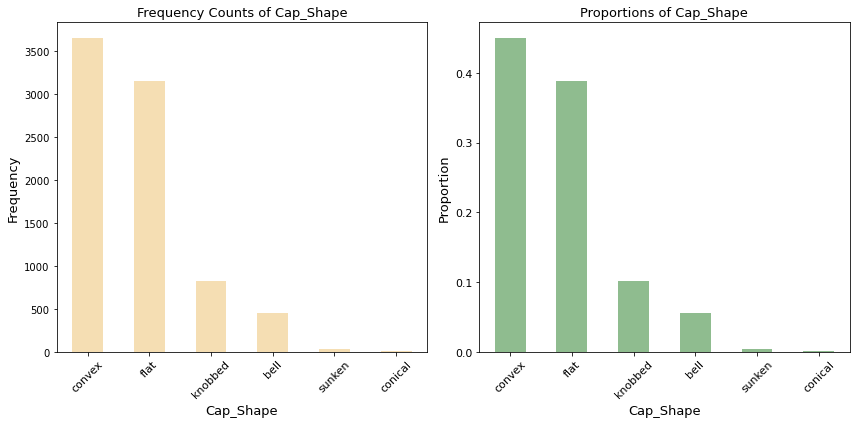

Frequency counts for cap_shape:
convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap_shape, dtype: int64

Proportions for cap_shape:
convex     0.4500
flat       0.3880
knobbed    0.1019
bell       0.0556
sunken     0.0039
conical    0.0005
Name: cap_shape, dtype: float64


In [9]:
# Calculating frequency counts for cap_shape:
cap_shape_counts = df['cap_shape'].value_counts()

# Calculating proportions for cap_shape:
cap_shape_proportions = df['cap_shape'].value_counts(normalize=True).round(4)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for cap_shape:
cap_shape_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Cap_Shape', fontsize=13)
axes[0].set_xlabel('Cap_Shape', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)


# Plotting proportions for cap_shape:
cap_shape_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Cap_Shape', fontsize=13)
axes[1].set_xlabel('Cap_Shape', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for cap_shape:
print("Frequency counts for cap_shape:")
print(cap_shape_counts)
print("\nProportions for cap_shape:")
print(cap_shape_proportions)

##### Observations:

- *convex* and *flat* cap shapes are the most prevalent, comprising around 84% of the data.

- The rarest shapes are *sunken* and *conical*, each representing less than 0.5% of the data.

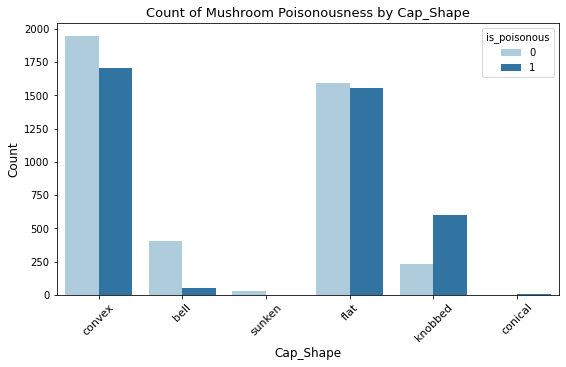


Frequency count of poisonousness within each cap_shape group:
is_poisonous     0     1
cap_shape               
bell           404    48
conical          0     4
convex        1948  1708
flat          1596  1556
knobbed        228   600
sunken          32     0

Proportions of poisonousness within each cap_shape group:
is_poisonous     0     1
cap_shape               
bell          0.89  0.11
conical       0.00  1.00
convex        0.53  0.47
flat          0.51  0.49
knobbed       0.28  0.72
sunken        1.00  0.00


In [10]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='cap_shape', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Cap_Shape', fontsize=13)
plt.xlabel('Cap_Shape', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
cap_shape_poison_counts = df.groupby(['cap_shape', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each cap_shape group:")
print(cap_shape_poison_counts)

cap_shape_poison_proportions = cap_shape_poison_counts.div(cap_shape_poison_counts.sum(axis=1), axis=0)
cap_shape_poison_proportions = cap_shape_poison_proportions.round(2)

print("\nProportions of poisonousness within each cap_shape group:")
print(cap_shape_poison_proportions)

##### Observations:

- *conical* shape is exclusively associated with poisonous mushrooms (100% poisonous).

- *sunken* shape is exclusively associated with non-poisonous mushrooms (100% non-poisonous).

- *bell* shape has a higher proportion of non-poisonous mushrooms (89%) compared to poisonous mushrooms (11%).

- *convex* shape has a relatively balanced proportion, with 47% poisonous and 53% non-poisonous mushrooms.

- *flat* shape also has a relatively balanced proportion, with 49% poisonous and 51% non-poisonous mushrooms.

- *knobbed* shape is predominantly associated with poisonous mushrooms, with 72% poisonous and 28% non-poisonous mushrooms.

##### Conclusion: 

- Class imbalance is evident within certain cap shapes. *knobbed* mushrooms have a higher proportion of poisonous instances compared to non-poisonous instances, indicating a class imbalance skewed towards poisonous mushrooms; *conical* and *sunken* mushrooms have extreme class imbalances, with all instances belonging to only one class (poisonous for *conical* and non-poisonous for *sunken*).

- *cap_shape* appears to be an important feature in predicting mushroom toxicity.  

##### 2. cap_surface

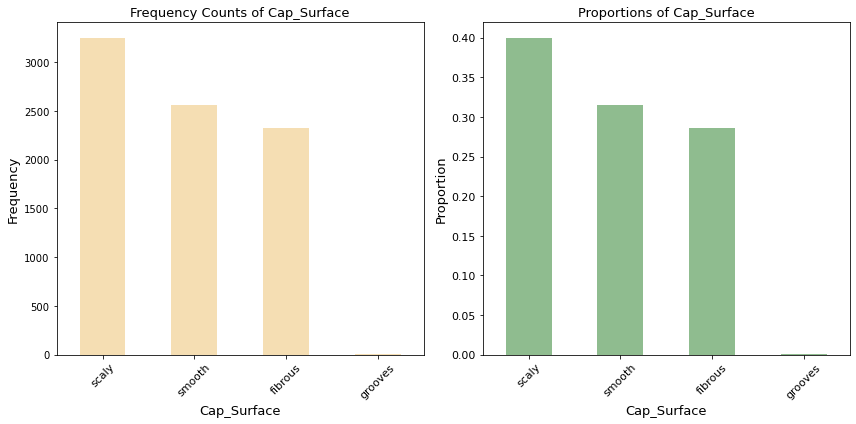

Frequency counts for cap_surface:
scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap_surface, dtype: int64

Proportions for cap_surface:
scaly      0.3993
smooth     0.3146
fibrous    0.2856
grooves    0.0005
Name: cap_surface, dtype: float64


In [11]:
# Calculating frequency counts for cap_surface:
cap_surface_counts = df['cap_surface'].value_counts()

# Calculating proportions for cap_surface:
cap_surface_proportions = df['cap_surface'].value_counts(normalize=True).round(4)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for cap_surface:
cap_surface_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Cap_Surface', fontsize=13)
axes[0].set_xlabel('Cap_Surface', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)


# Plotting proportions for cap_surface:
cap_surface_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Cap_Surface', fontsize=13)
axes[1].set_xlabel('Cap_Surface', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout
plt.tight_layout()

# Showing plot
plt.show()

# Print frequency counts and proportions for cap_surface:
print("Frequency counts for cap_surface:")
print(cap_surface_counts)
print("\nProportions for cap_surface:")
print(cap_surface_proportions)

##### Observations:

- *scaly* surface comprises approximately 40% of the total data, followed by *smooth* (31%) and *fibrous* (29%). 

- *grooves* is the rarest surface type, making up only 0.05% of the data. 
 

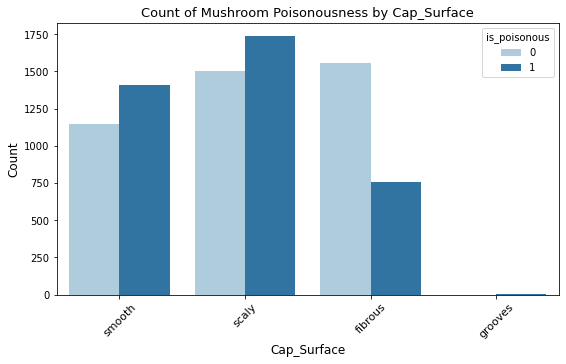


Frequency count of poisonousness within each cap_surface group:
is_poisonous     0     1
cap_surface             
fibrous       1560   760
grooves          0     4
scaly         1504  1740
smooth        1144  1412

Proportions of poisonousness within each cap_surface group:
is_poisonous     0     1
cap_surface             
fibrous       0.67  0.33
grooves       0.00  1.00
scaly         0.46  0.54
smooth        0.45  0.55


In [12]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='cap_surface', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Cap_Surface', fontsize=13)
plt.xlabel('Cap_Surface', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
cap_surface_poison_counts = df.groupby(['cap_surface', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each cap_surface group:")
print(cap_surface_poison_counts)

cap_surface_poison_proportions = cap_surface_poison_counts.div(cap_surface_poison_counts.sum(axis=1), axis=0)
cap_surface_poison_proportions = cap_surface_poison_proportions.round(2)

print("\nProportions of poisonousness within each cap_surface group:")
print(cap_surface_poison_proportions)

##### Observations:

- *grooves* surface is exclusively associated with poisonous mushrooms (100% poisonous).

- *fibrous* surface has a higher proportion of non-poisonous mushrooms (67%) compared to poisonous mushrooms (33%).

- *scaly* surface has a relatively balanced proportion, with 54% poisonous and 46% non-poisonous mushrooms.

- *smooth* surface also has a balanced proportion, with 55% poisonous and 45% non-poisonous mushrooms.

##### Conclusion:

- Class imbalance is observed within certain cap surface categories. For example:

    - *grooves* surfaces have an extreme class imbalance, with all instances being poisonous (100% poisonous).

    - *fibrous* surfaces have a higher proportion of non-poisonous instances (67%) compared to poisonous instances (33%).

    - *scaly* and *smooth* surfaces also exhibit class imbalance, with slightly higher proportions of poisonous instances compared to non-poisonous instances.
    
- *cap_surface* appears to be an important feature in predicting mushroom toxicity.



##### 3. cap_color

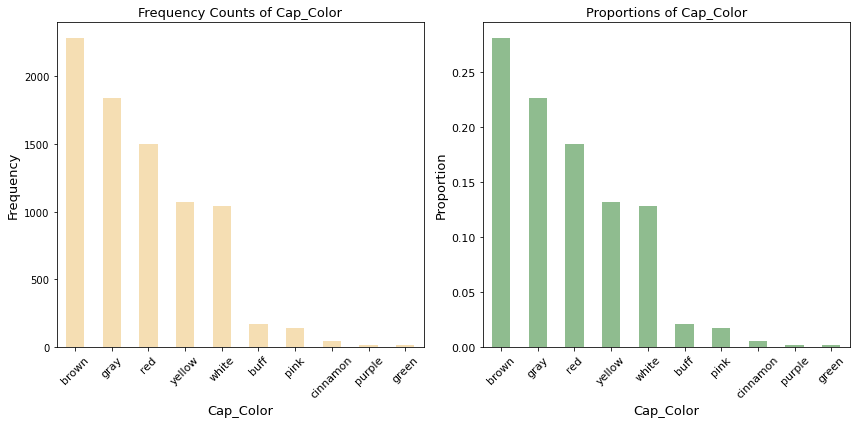

Frequency counts for cap_color:
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: cap_color, dtype: int64

Proportions for cap_color:
brown       0.2811
gray        0.2265
red         0.1846
yellow      0.1320
white       0.1280
buff        0.0207
pink        0.0177
cinnamon    0.0054
purple      0.0020
green       0.0020
Name: cap_color, dtype: float64


In [13]:
# Calculating frequency counts for cap_color:
cap_color_counts = df['cap_color'].value_counts()

# Calculating proportions for cap_color:
cap_color_proportions = df['cap_color'].value_counts(normalize=True).round(4)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for cap_color:
cap_color_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Cap_Color', fontsize=13)
axes[0].set_xlabel('Cap_Color', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for cap_color:
cap_color_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Cap_Color', fontsize=13)
axes[1].set_xlabel('Cap_Color', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for cap_color:
print("Frequency counts for cap_color:")
print(cap_color_counts)
print("\nProportions for cap_color:")
print(cap_color_proportions)

##### Observations: 

- *brown* is the most common cap color, followed by *gray*, *red*, *yellow*, and *white* (all 5 colors represent 95% of the data). 

- *green*, *pink*, *cinnamon*, and *purple* are relatively rare colors. 

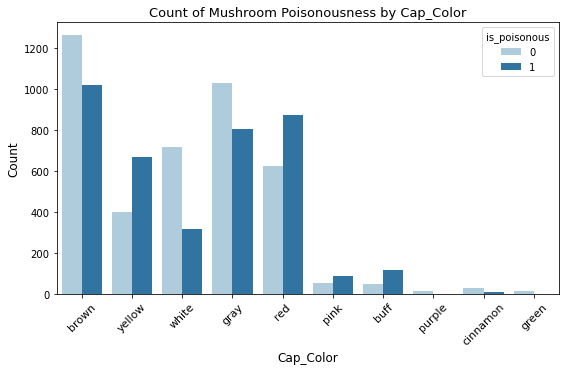


Frequency count of poisonousness within each cap_color group:
is_poisonous     0     1
cap_color               
brown         1264  1020
buff            48   120
cinnamon        32    12
gray          1032   808
green           16     0
pink            56    88
purple          16     0
red            624   876
white          720   320
yellow         400   672

Proportions of poisonousness within each cap_color group:
is_poisonous     0     1
cap_color               
brown         0.55  0.45
buff          0.29  0.71
cinnamon      0.73  0.27
gray          0.56  0.44
green         1.00  0.00
pink          0.39  0.61
purple        1.00  0.00
red           0.42  0.58
white         0.69  0.31
yellow        0.37  0.63


In [14]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='cap_color', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Cap_Color', fontsize=13)
plt.xlabel('Cap_Color', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
cap_color_poison_counts = df.groupby(['cap_color', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each cap_color group:")
print(cap_color_poison_counts)

cap_color_poison_proportions = cap_color_poison_counts.div(cap_color_poison_counts.sum(axis=1), axis=0)
cap_color_poison_proportions = cap_color_poison_proportions.round(2)

print("\nProportions of poisonousness within each cap_color group:")
print(cap_color_poison_proportions)

##### Observations:

- *green* and *purple* colors are exclusively associated with non-poisonous mushrooms (100% non-poisonous).

- *buff*, *cinnamon*, and *pink* colors have a higher proportion of poisonous mushrooms compared to non-poisonous mushrooms.

- *red* and *yellow* colors have a higher proportion of poisonous mushrooms compared to non-poisonous mushrooms as well.

- *white* color has a relatively balanced proportion, with 31% poisonous and 69% non-poisonous mushrooms.

- *brown* and *gray* colors also have a relatively balanced proportion, with slightly higher proportions of non-poisonous mushrooms.

##### Conclusion:

- The distribution of mushrooms across different cap colors shows a bias towards *brown*, *gray*, *red*, and *yellow* colors, which collectively represent the majority of the data.

- Class imbalance is observed within certain cap color categories. *green* and *purple* indicate extreme class imbalance, with only poisonous instances present while *buff* and *cinnamon* also demonstrate substantial imbalances.
    
- *cap_color* appears to be an important feature in predicting mushroom toxicity.



##### 4. has_bruises                  

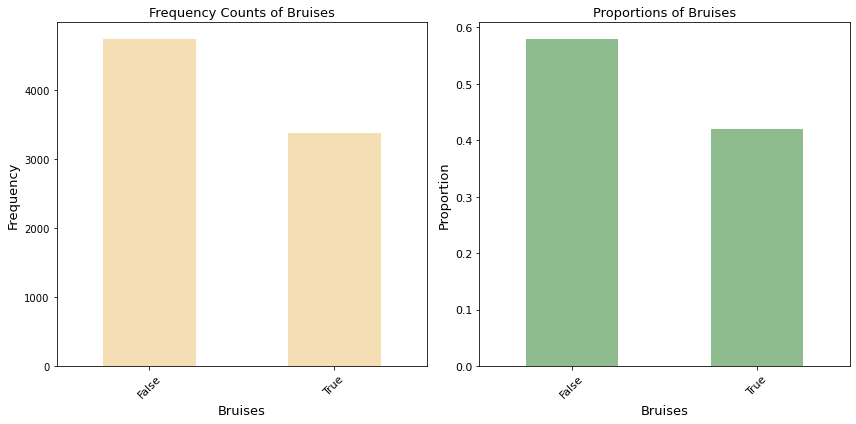

Frequency counts for has_bruises:
False    4748
True     3376
Name: has_bruises, dtype: int64

Proportions for has_bruises:
False    0.58
True     0.42
Name: has_bruises, dtype: float64


In [15]:
# Calculating frequency counts for has_bruises:
bruises_counts = df['has_bruises'].value_counts()

# Calculating proportions for has_bruises:
bruises_proportions = df['has_bruises'].value_counts(normalize=True).round(2)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for has_bruises:
bruises_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Bruises', fontsize=13)
axes[0].set_xlabel('Bruises', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for has_bruises:
bruises_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Bruises', fontsize=13)
axes[1].set_xlabel('Bruises', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for has_bruises:
print("Frequency counts for has_bruises:")
print(bruises_counts)
print("\nProportions for has_bruises:")
print(bruises_proportions)

##### Observations:

- Mushrooms without bruises comprise 58% of the dataset, while mushrooms with bruises make up 42% of the dataset.

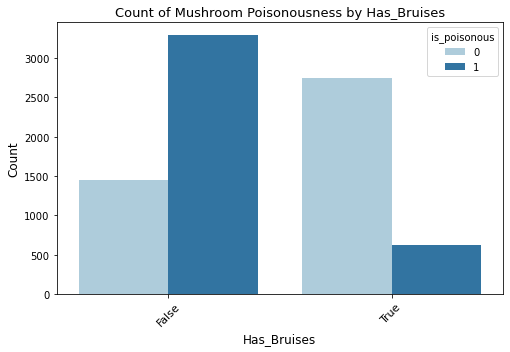


Frequency count of poisonousness within each has_bruises group:
is_poisonous     0     1
has_bruises             
False         1456  3292
True          2752   624

Proportions of poisonousness within each has_bruises group:
is_poisonous     0     1
has_bruises             
False         0.31  0.69
True          0.82  0.18


In [16]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(8, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='has_bruises', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Has_Bruises', fontsize=13)
plt.xlabel('Has_Bruises', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
has_bruises_poison_counts = df.groupby(['has_bruises', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each has_bruises group:")
print(has_bruises_poison_counts)

has_bruises_poison_proportions = has_bruises_poison_counts.div(has_bruises_poison_counts.sum(axis=1), axis=0)
has_bruises_poison_proportions = has_bruises_poison_proportions.round(2)

print("\nProportions of poisonousness within each has_bruises group:")
print(has_bruises_poison_proportions)

##### Observations:

- Within the mushrooms without bruises, 69% are poisonous and 31% are non-poisonous.

- Within the mushrooms with bruises, 18% are poisonous and 82% are non-poisonous.

##### Conclusion:

- The dataset contains a higher proportion of mushrooms without bruises compared to mushrooms with bruises, indicating a bias towards mushrooms without bruises.

- There is a significant class imbalance within the *has_bruises* variable since among mushrooms without bruises, 69% are poisonous, whereas among mushrooms with bruises, only 18% are poisonous.

- *has_bruises* appears to be an important factor in predicting mushroom toxicity.


##### 5. odor                         

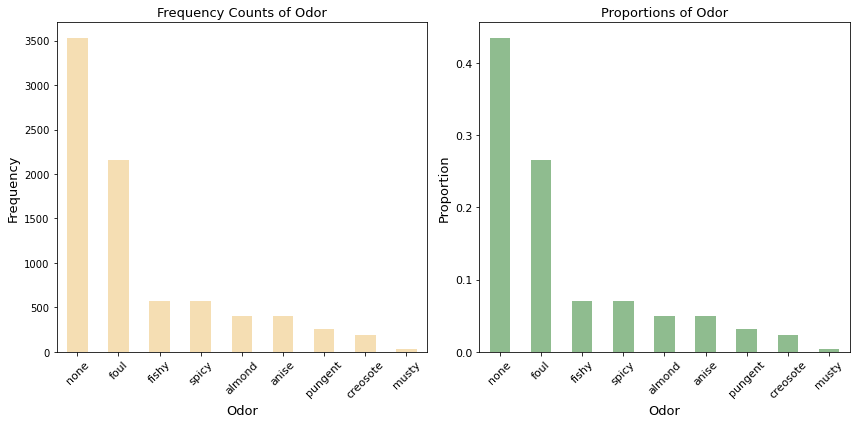

Frequency counts for odor:
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64

Proportions for odor:
none        0.4343
foul        0.2659
fishy       0.0709
spicy       0.0709
almond      0.0492
anise       0.0492
pungent     0.0315
creosote    0.0236
musty       0.0044
Name: odor, dtype: float64


In [17]:
# Calculating frequency counts for odor:
odor_counts = df['odor'].value_counts()

# Calculating proportions for odor:
odor_proportions = df['odor'].value_counts(normalize=True).round(4)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for odor:
odor_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Odor', fontsize=13)
axes[0].set_xlabel('Odor', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for odor:
odor_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Odor', fontsize=13)
axes[1].set_xlabel('Odor', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for odor:
print("Frequency counts for odor:")
print(odor_counts)
print("\nProportions for odor:")
print(odor_proportions)

##### Observations:

- *none* odor comprises the highest proportion of the dataset at 43.43%, with *musty* odor having the smallest proportion at 0.44%.

- *none* and *foul* make up 70% of the dataset. 

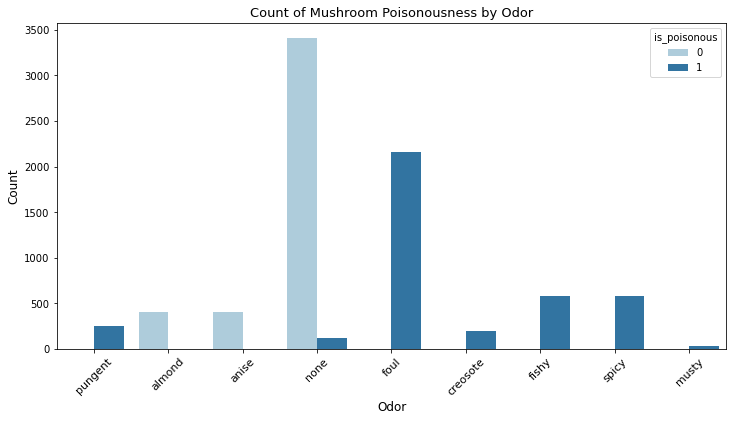


Frequency count of poisonousness within each odor group:
is_poisonous     0     1
odor                    
almond         400     0
anise          400     0
creosote         0   192
fishy            0   576
foul             0  2160
musty            0    36
none          3408   120
pungent          0   256
spicy            0   576

Proportions of poisonousness within each odor group:
is_poisonous     0     1
odor                    
almond        1.00  0.00
anise         1.00  0.00
creosote      0.00  1.00
fishy         0.00  1.00
foul          0.00  1.00
musty         0.00  1.00
none          0.97  0.03
pungent       0.00  1.00
spicy         0.00  1.00


In [18]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(12, 6))

# Plotting countplot with the paired color palette:
sns.countplot(x='odor', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Odor', fontsize=13)
plt.xlabel('Odor', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
odor_poison_counts = df.groupby(['odor', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each odor group:")
print(odor_poison_counts)

odor_poison_proportions = odor_poison_counts.div(odor_poison_counts.sum(axis=1), axis=0)
odor_poison_proportions = odor_poison_proportions.round(2)

print("\nProportions of poisonousness within each odor group:")
print(odor_poison_proportions)

##### Observations:

- Mushrooms with *creosote*, *fishy*, *foul*, *musty*, *pungent*, and *spicy* odors are exclusively associated with poisonous mushrooms (100% poisonous).

- *almond* and *anise'* odors are exclusively associated with non-poisonous mushrooms (100% non-poisonous).

- *none* odor has a predominantly non-poisonous association, with 97% non-poisonous and 3% poisonous mushrooms. 

##### Conclusion:

- There is a bias towards the *none* order since mushrooms with no order make up the highest proportion of mushrooms in the dataset.

- There is significant class imbalance within the *odor* variable, with the least extreme balance being with the *none* odor, where non-poisonous mushrooms dominate (97%). The other categories have maximum imbalances, either being exclusively poisonous or non-poisonous.

- *odor* appears to be an important feature in predicting mushroom toxicity. 

##### 6. gill_attachment              

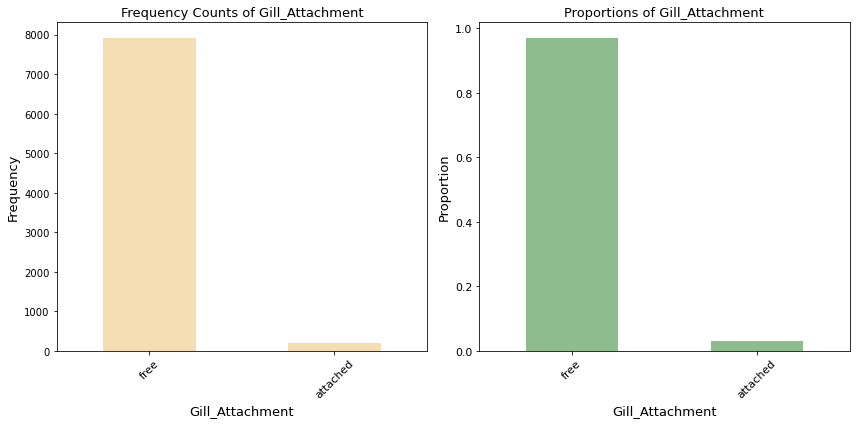

Frequency counts for gill_attachment:
free        7914
attached     210
Name: gill_attachment, dtype: int64

Proportions for gill_attachment:
free        0.97
attached    0.03
Name: gill_attachment, dtype: float64


In [19]:
# Calculating frequency counts for gill_attachment:
gill_attachment_counts = df['gill_attachment'].value_counts()

# Calculating proportions for gill_attachment:
gill_attachment_proportions = df['gill_attachment'].value_counts(normalize=True).round(2)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for gill_attachment:
gill_attachment_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Gill_Attachment', fontsize=13)
axes[0].set_xlabel('Gill_Attachment', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for gill_attachment:
gill_attachment_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Gill_Attachment', fontsize=13)
axes[1].set_xlabel('Gill_Attachment', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for gill_attachment:
print("Frequency counts for gill_attachment:")
print(gill_attachment_counts)
print("\nProportions for gill_attachment:")
print(gill_attachment_proportions)

##### Observations:

-  The majority of mushrooms having *free* gill attachment (97%).

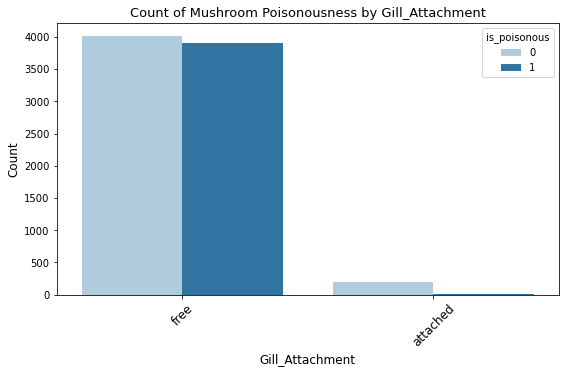


Frequency count of poisonousness within each gill_attachment group:
is_poisonous        0     1
gill_attachment            
attached          192    18
free             4016  3898

Proportions of poisonousness within each gill_attachment group:
is_poisonous        0     1
gill_attachment            
attached         0.91  0.09
free             0.51  0.49


In [20]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='gill_attachment', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Gill_Attachment', fontsize=13)
plt.xlabel('Gill_Attachment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=12, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
gill_attachment_poison_counts = df.groupby(['gill_attachment', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each gill_attachment group:")
print(gill_attachment_poison_counts)

gill_attachment_poison_proportions = gill_attachment_poison_counts.div(gill_attachment_poison_counts.sum(axis=1), axis=0)
gill_attachment_poison_proportions = gill_attachment_poison_proportions.round(2)

print("\nProportions of poisonousness within each gill_attachment group:")
print(gill_attachment_poison_proportions)

##### Observations:

- For mushrooms with *attached* gill attachment, 91% are non-poisonous and 9% are poisonous.

- For mushrooms with *free* gill attachment, 51% are non-poisonous and 49% are poisonous, making it a more balanced distribution. 

##### Conclusion:

- Representation bias is clear in this case, where *free* gill attachment dominates the dataset. 

- The class imbalance within the *gill_attachment* variable exists when considering poisonousness. While the majority of mushrooms with *attached* gill attachment are non-poisonous, the distribution is more balanced among mushrooms with *free* gill attachment.

- *gill_attachment* appears to be an important feature in predicting mushroom toxicity.

##### 7. gill_spacing                 

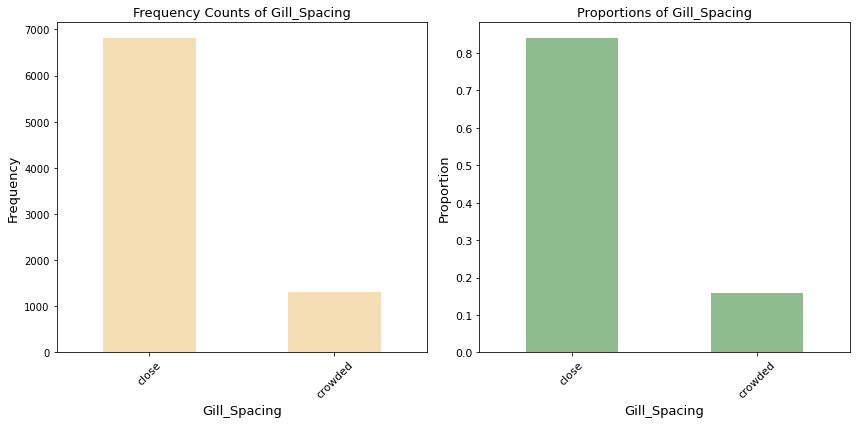

Frequency counts for gill_spacing:
close      6812
crowded    1312
Name: gill_spacing, dtype: int64

Proportions for gill_spacing:
close      0.84
crowded    0.16
Name: gill_spacing, dtype: float64


In [21]:
# Calculating frequency counts for gill_spacing:
gill_spacing_counts = df['gill_spacing'].value_counts()

# Calculating proportions for gill_spacing:
gill_spacing_proportions = df['gill_spacing'].value_counts(normalize=True).round(2)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for gill_spacing:
gill_spacing_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Gill_Spacing', fontsize=13)
axes[0].set_xlabel('Gill_Spacing', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for gill_spacing:
gill_spacing_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Gill_Spacing', fontsize=13)
axes[1].set_xlabel('Gill_Spacing', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for gill_spacing:
print("Frequency counts for gill_spacing:")
print(gill_spacing_counts)
print("\nProportions for gill_spacing:")
print(gill_spacing_proportions)

##### Observations:

- *close* gill spacing comprises the majority of the dataset at 84%, while *crowded* gill spacing accounts for 16%.

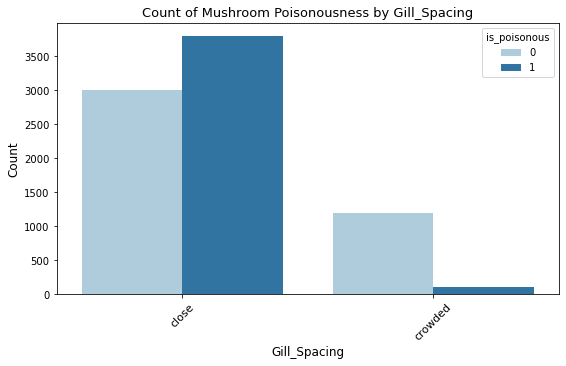


Frequency count of poisonousness within each gill_spacing group:
is_poisonous     0     1
gill_spacing            
close         3008  3804
crowded       1200   112

Proportions of poisonousness within each gill_spacing group:
is_poisonous     0     1
gill_spacing            
close         0.44  0.56
crowded       0.91  0.09


In [22]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='gill_spacing', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Gill_Spacing', fontsize=13)
plt.xlabel('Gill_Spacing', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
gill_spacing_poison_counts = df.groupby(['gill_spacing', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each gill_spacing group:")
print(gill_spacing_poison_counts)

gill_spacing_poison_proportions = gill_spacing_poison_counts.div(gill_spacing_poison_counts.sum(axis=1), axis=0)
gill_spacing_poison_proportions = gill_spacing_poison_proportions.round(2)

print("\nProportions of poisonousness within each gill_spacing group:")
print(gill_spacing_poison_proportions)

##### Observations:

- For mushrooms with *close* gill spacing, 44% are non-poisonous and 56% are poisonous.

- For mushrooms with *crowded* gill spacing, 91% are non-poisonous and 9% are poisonous.

###### Conclusion:

- The majority of mushrooms in the dataset have *close* gill spacing. This indicates a representation bias, since *close* gill spacing makes up 84% of the data. 

- There is significant class imbalance within *gill_spacing* groups. For the *close* group, the proportions are more balanced, while for the *crowded* group, there is a considerable imbalance. For instance, while 56 % of mushrooms with *close* gill spacing are poisonous, a higher proportion of mushrooms with *crowded* gill spacing are non-poisonous (91%). 

- *gill_spacing* appears to be an important feature in predicting mushroom toxicity. 

##### 8. gill_size                    

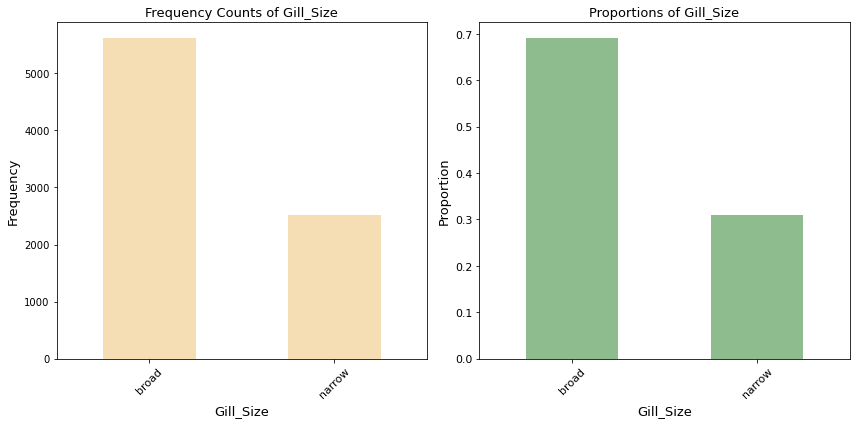

Frequency counts for gill_size:
broad     5612
narrow    2512
Name: gill_size, dtype: int64

Proportions for gill_size:
broad     0.69
narrow    0.31
Name: gill_size, dtype: float64


In [23]:
# Calculating frequency counts for gill_size:
gill_size_counts = df['gill_size'].value_counts()

# Calculating proportions for gill_size:
gill_size_proportions = df['gill_size'].value_counts(normalize=True).round(2)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for gill_size:
gill_size_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Gill_Size', fontsize=13)
axes[0].set_xlabel('Gill_Size', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for gill_size:
gill_size_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Gill_Size', fontsize=13)
axes[1].set_xlabel('Gill_Size', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for gill_size:
print("Frequency counts for gill_size:")
print(gill_size_counts)
print("\nProportions for gill_size:")
print(gill_size_proportions)

##### Observations:

- *broad* gill size makes up the majority of the dataset at 69%, while *narrow* gill size accounts for 31%.

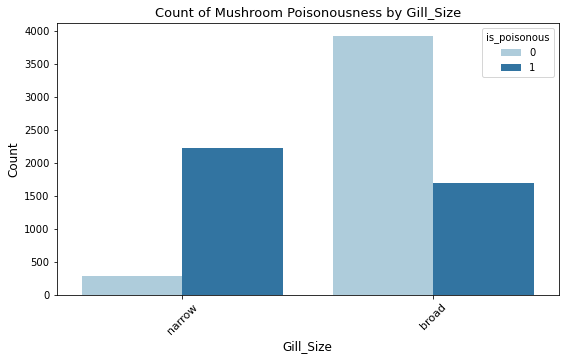


Frequency count of poisonousness within each gill_size group:
is_poisonous     0     1
gill_size               
broad         3920  1692
narrow         288  2224

Proportions of poisonousness within each gill_size group:
is_poisonous     0     1
gill_size               
broad         0.70  0.30
narrow        0.11  0.89


In [24]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='gill_size', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Gill_Size', fontsize=13)
plt.xlabel('Gill_Size', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
gill_size_poison_counts = df.groupby(['gill_size', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each gill_size group:")
print(gill_size_poison_counts)

gill_size_poison_proportions = gill_size_poison_counts.div(gill_size_poison_counts.sum(axis=1), axis=0)
gill_size_poison_proportions = gill_size_poison_proportions.round(2)

print("\nProportions of poisonousness within each gill_size group:")
print(gill_size_poison_proportions)

##### Observations:

- For mushrooms with *broad* gill size, 70% are non-poisonous and 30% are poisonous.

- For mushrooms with *narrow* gill size, 11% are non-poisonous and 89% are poisonous.

##### Conclusion:

- The *gill_size* variable shows a significant representation bias, with the majority of mushrooms having *broad* gill size at 69%. 

- There is a significant class imbalance in the distribution of poisonous and non-poisonous mushrooms within each gill size category. 

- *gill_size* appears to be an important feature in predicting mushroom toxicity.


##### 9. gill_color                   

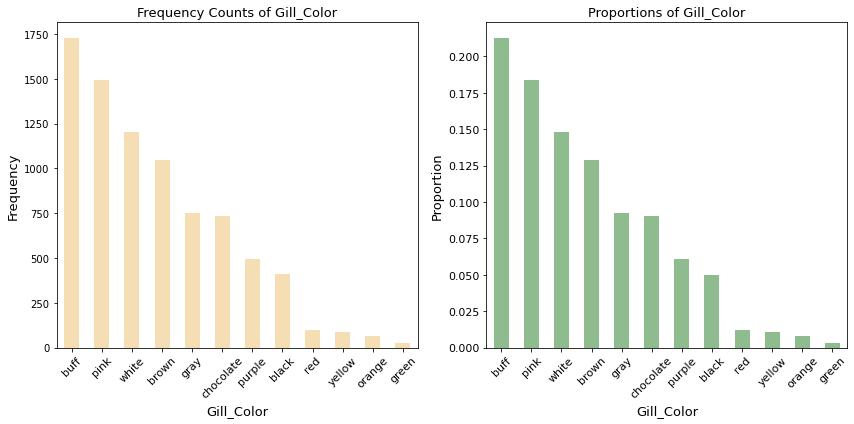

Frequency counts for gill_color:
buff         1728
pink         1492
white        1202
brown        1048
gray          752
chocolate     732
purple        492
black         408
red            96
yellow         86
orange         64
green          24
Name: gill_color, dtype: int64

Proportions for gill_color:
buff         0.2127
pink         0.1837
white        0.1480
brown        0.1290
gray         0.0926
chocolate    0.0901
purple       0.0606
black        0.0502
red          0.0118
yellow       0.0106
orange       0.0079
green        0.0030
Name: gill_color, dtype: float64


In [25]:
# Calculating frequency counts for gill_color:
gill_color_counts = df['gill_color'].value_counts()

# Calculating proportions for gill_color:
gill_color_proportions = df['gill_color'].value_counts(normalize=True).round(4)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for gill_color:
gill_color_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Gill_Color', fontsize=13)
axes[0].set_xlabel('Gill_Color', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for gill_color:
gill_color_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Gill_Color', fontsize=13)
axes[1].set_xlabel('Gill_Color', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for gill_color:
print("Frequency counts for gill_color:")
print(gill_color_counts)
print("\nProportions for gill_color:")
print(gill_color_proportions)

##### Observations:

- The most prevalent gill colors are *buff*, *pink*, and *white*, with all comprising approximately 55% of the dataset. 

- Rare gill colors are *purple*, *black*, *red*, *yellow*, *orange*, and *green*, with all making up 8% of the dataset. 

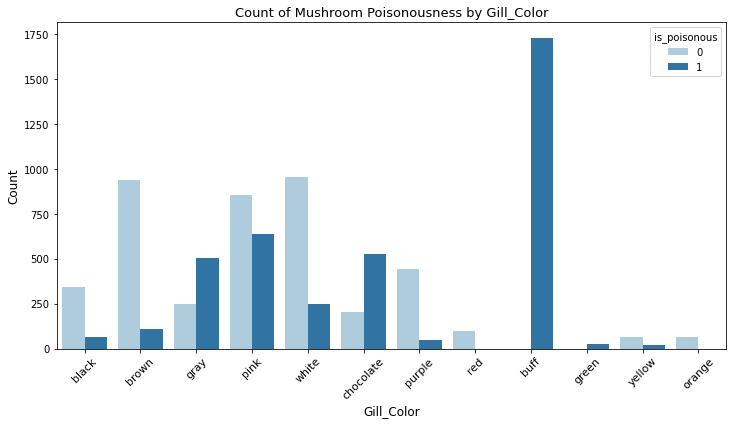


Frequency count of poisonousness within each gill_color group:
is_poisonous    0     1
gill_color             
black         344    64
brown         936   112
buff            0  1728
chocolate     204   528
gray          248   504
green           0    24
orange         64     0
pink          852   640
purple        444    48
red            96     0
white         956   246
yellow         64    22

Proportions of poisonousness within each gill_color group:
is_poisonous     0     1
gill_color              
black         0.84  0.16
brown         0.89  0.11
buff          0.00  1.00
chocolate     0.28  0.72
gray          0.33  0.67
green         0.00  1.00
orange        1.00  0.00
pink          0.57  0.43
purple        0.90  0.10
red           1.00  0.00
white         0.80  0.20
yellow        0.74  0.26


In [26]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(12, 6))

# Plotting countplot with the paired color palette:
sns.countplot(x='gill_color', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Gill_Color', fontsize=13)
plt.xlabel('Gill_Color', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
gill_color_poison_counts = df.groupby(['gill_color', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each gill_color group:")
print(gill_color_poison_counts)

gill_color_poison_proportions = gill_color_poison_counts.div(gill_color_poison_counts.sum(axis=1), axis=0)
gill_color_poison_proportions = gill_color_poison_proportions.round(2)

print("\nProportions of poisonousness within each gill_color group:")
print(gill_color_poison_proportions)

##### Observations:

- Gill colors such as *chocolate*, *purple*, and *gray* have a higher proportion of poisonous mushrooms, with approximately 72%, 10%, and 67% of mushrooms in these colors being poisonous, respectively.

-  Gill colors like *white*, *brown*, and *black* have a higher proportion of non-poisonous mushrooms, with approximately 80%, 89%, and 84% of mushrooms in these colors being non-poisonous, respectively.

##### Conclusions:

- There is representation bias as seen in the various frequency counts across different gill colors. For example, *buff*, *pink*, and *white* gill colors have relatively high frequency counts, while *green* and *orange* gill colors have much lower frequency counts, indicating a bias towards *buff*, *pink*, and *white*. 

- Some gill colors exhibit an extreme class imbalance. For example, all mushrooms with *buff* and *green* gill colors are poisonous (100%), while those with *orange* and *red* gill colors are non-poisonous (100%).

- *gill_color* appears to be an important feature in predicting mushroom toxicity.

##### 10. stalk_shape                  

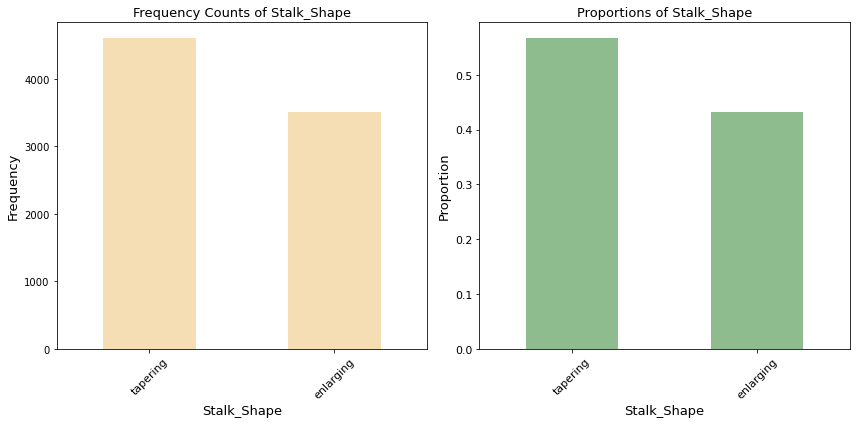

Frequency counts for stalk_shape:
tapering     4608
enlarging    3516
Name: stalk_shape, dtype: int64

Proportions for stalk_shape:
tapering     0.567208
enlarging    0.432792
Name: stalk_shape, dtype: float64


In [27]:
# Calculating frequency counts for stalk_shape:
stalk_shape_counts = df['stalk_shape'].value_counts()

# Calculating proportions for stalk_shape:
stalk_shape_proportions = df['stalk_shape'].value_counts(normalize=True)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for stalk_shape:
stalk_shape_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Stalk_Shape', fontsize=13)
axes[0].set_xlabel('Stalk_Shape', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for stalk_shape:
stalk_shape_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Stalk_Shape', fontsize=13)
axes[1].set_xlabel('Stalk_Shape', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for stalk_shape:
print("Frequency counts for stalk_shape:")
print(stalk_shape_counts)
print("\nProportions for stalk_shape:")
print(stalk_shape_proportions)

##### Observations:

- The proportions of mushrooms with tapering stalk shape (56.72%) are higher than those with enlarging stalk shape (43.28%). 

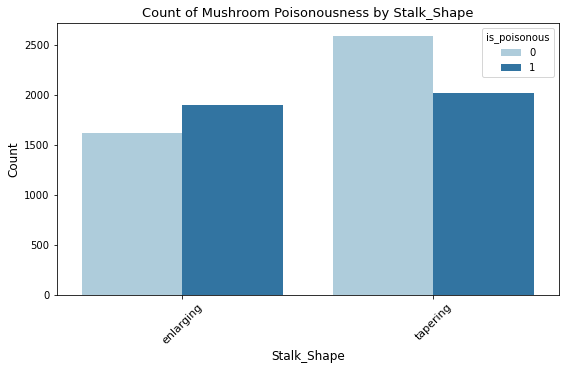


Frequency count of poisonousness within each stalk_shape group:
is_poisonous     0     1
stalk_shape             
enlarging     1616  1900
tapering      2592  2016

Proportions of poisonousness within each stalk_shape group:
is_poisonous     0     1
stalk_shape             
enlarging     0.46  0.54
tapering      0.56  0.44


In [28]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='stalk_shape', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Stalk_Shape', fontsize=13)
plt.xlabel('Stalk_Shape', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
stalk_shape_poison_counts = df.groupby(['stalk_shape', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each stalk_shape group:")
print(stalk_shape_poison_counts)

stalk_shape_poison_proportions = stalk_shape_poison_counts.div(stalk_shape_poison_counts.sum(axis=1), axis=0)
stalk_shape_poison_proportions = stalk_shape_poison_proportions.round(2)

print("\nProportions of poisonousness within each stalk_shape group:")
print(stalk_shape_poison_proportions)

##### Observations:

- For mushroom with an enlarging stalk shape, 46% are non-poisonous and 54% are poisonous.

- For mushrooms with tapering stalk shape, 56% are non-poisonous and 44% are poisonous. 

##### Conclusion:

- There is a bias towards *tapering* stalks since there are significantly more observations for *tapering* stalks. 

- There is only a slight (non significant) class imbalance since the ratio between non-poisonous and poisonous mushrooms in both groups is almost evenly split.

- *stalk_shape* appears to be an important feature in predicting mushroom toxicity.

##### 11. stalk_surface_above_ring     

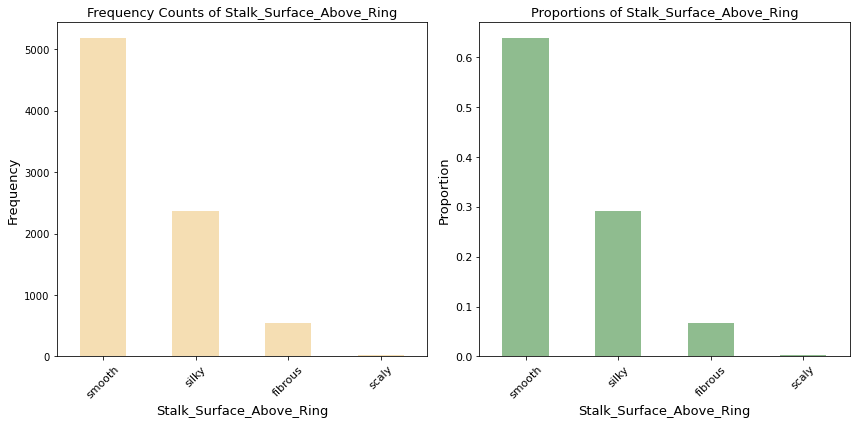

Frequency counts for stalk_surface_above_ring:
smooth     5176
silky      2372
fibrous     552
scaly        24
Name: stalk_surface_above_ring, dtype: int64

Proportions for stalk_surface_above_ring:
smooth     0.637125
silky      0.291974
fibrous    0.067947
scaly      0.002954
Name: stalk_surface_above_ring, dtype: float64


In [29]:
# Calculating frequency counts for stalk_surface_above_ring:
stalk_surface_above_ring_counts = df['stalk_surface_above_ring'].value_counts()

# Calculating proportions for stalk_surface_above_ring:
stalk_surface_above_ring_proportions = df['stalk_surface_above_ring'].value_counts(normalize=True)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for stalk_surface_above_ring:
stalk_surface_above_ring_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Stalk_Surface_Above_Ring', fontsize=13)
axes[0].set_xlabel('Stalk_Surface_Above_Ring', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for stalk_surface_above_ring:
stalk_surface_above_ring_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Stalk_Surface_Above_Ring', fontsize=13)
axes[1].set_xlabel('Stalk_Surface_Above_Ring', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for stalk_surface_above_ring:
print("Frequency counts for stalk_surface_above_ring:")
print(stalk_surface_above_ring_counts)
print("\nProportions for stalk_surface_above_ring:")
print(stalk_surface_above_ring_proportions)

##### Observations:

- *smooth* surface makes up approximately 64% of the total data, making it the most prevalent surface type.

- *silky* surface represents around 29% of the data, followed by *fibrous* (7%) and *scaly* (0.30%).


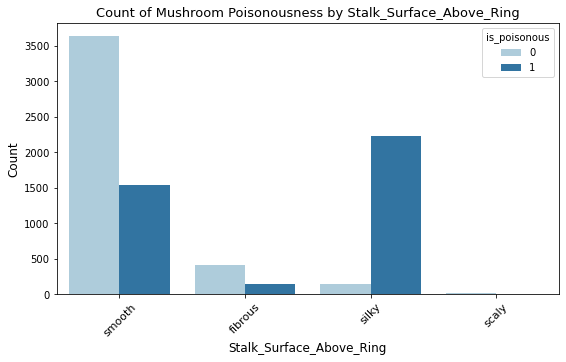


Frequency count of poisonousness within each stalk_surface_above_ring group:
is_poisonous                 0     1
stalk_surface_above_ring            
fibrous                    408   144
scaly                       16     8
silky                      144  2228
smooth                    3640  1536

Proportions of poisonousness within each stalk_surface_above_ring group:
is_poisonous                 0     1
stalk_surface_above_ring            
fibrous                   0.74  0.26
scaly                     0.67  0.33
silky                     0.06  0.94
smooth                    0.70  0.30


In [30]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='stalk_surface_above_ring', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Stalk_Surface_Above_Ring', fontsize=13)
plt.xlabel('Stalk_Surface_Above_Ring', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
stalk_surface_above_ring_poison_counts = df.groupby(['stalk_surface_above_ring', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each stalk_surface_above_ring group:")
print(stalk_surface_above_ring_poison_counts)

stalk_surface_above_ring_poison_proportions = stalk_surface_above_ring_poison_counts.div(stalk_surface_above_ring_poison_counts.sum(axis=1), axis=0)
stalk_surface_above_ring_poison_proportions = stalk_surface_above_ring_poison_proportions.round(2)

print("\nProportions of poisonousness within each stalk_surface_above_ring group:")
print(stalk_surface_above_ring_poison_proportions)

##### Observations:

- *fibrous* has a higher proportion of poisonous mushrooms (26%) compared to non-poisonous ones (74%).

- *scaly* also has a higher proportion of poisonous mushrooms (33%) compared to non-poisonous ones (67%).

- *silky* predominantly consists of non-poisonous mushrooms (94%), with a small proportion being poisonous (6%).

- *smooth* surface has a relatively balanced proportion, with 30% poisonous and 70% non-poisonous mushrooms.

##### Conclusion:

- The distribution of mushrooms across different surface types shows a bias towards *smooth* and *silky* surfaces, which collectively represent over 92% of the data.

- There are class imbalances withint the different surface types.  *Fibrous* and *scaly* surfaces exhibit a class imbalance towards poisonous mushrooms, while *silky* and *smooth* surfaces show relatively balanced proportions.

- *stalk_surface_above_ring* appears to be an important feature in predicting mushroom toxicity.

###### 12. stalk_surface_belows_ring    

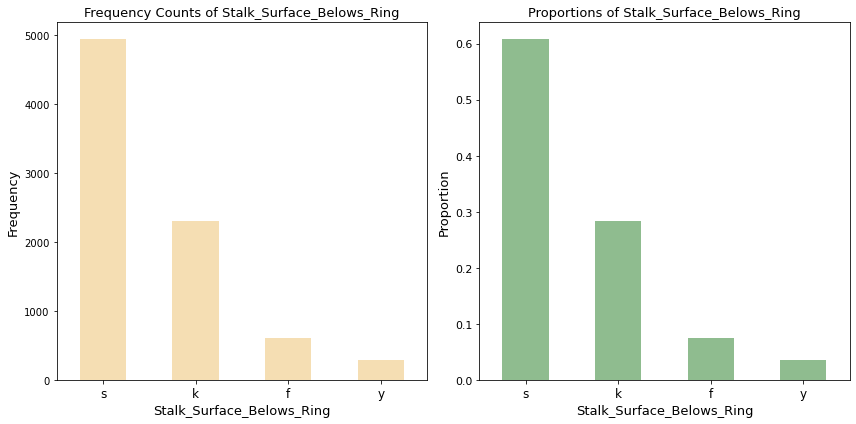

Frequency counts for stalk_surface_belows_ring:
s    4936
k    2304
f     600
y     284
Name: stalk_surface_belows_ring, dtype: int64

Proportions for stalk_surface_belows_ring:
s    0.607582
k    0.283604
f    0.073855
y    0.034958
Name: stalk_surface_belows_ring, dtype: float64


In [31]:
# Calculating frequency counts for stalk_surface_belows_ring:
stalk_surface_belows_ring_counts = df['stalk_surface_belows_ring'].value_counts()

# Calculating proportions for stalk_surface_belows_ring:
stalk_surface_belows_ring_proportions = df['stalk_surface_belows_ring'].value_counts(normalize=True)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for stalk_surface_belows_ring:
stalk_surface_belows_ring_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Stalk_Surface_Belows_Ring', fontsize=13)
axes[0].set_xlabel('Stalk_Surface_Belows_Ring', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', labelsize=12, rotation=360)

# Plotting proportions for stalk_surface_belows_ring:
stalk_surface_belows_ring_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Stalk_Surface_Belows_Ring', fontsize=13)
axes[1].set_xlabel('Stalk_Surface_Belows_Ring', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', labelsize=12, rotation=360)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for stalk_surface_belows_ring:
print("Frequency counts for stalk_surface_belows_ring:")
print(stalk_surface_belows_ring_counts)
print("\nProportions for stalk_surface_belows_ring:")
print(stalk_surface_belows_ring_proportions)

##### Observations:

- *s* makes up approximately 61% of the total data, making it the most prevalent type.

- *k* represents around 28% of the data, followed by *f* (7%) and *y* (3.50%).


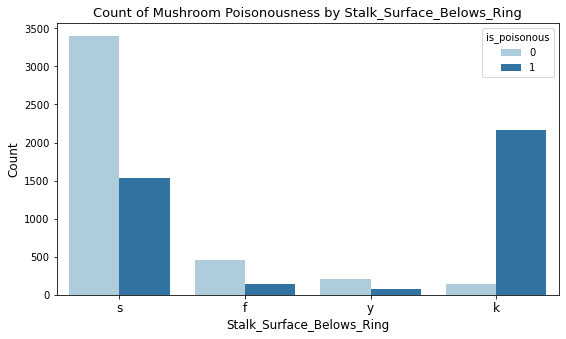


Frequency count of poisonousness within each stalk_surface_belows_ring group:
is_poisonous                  0     1
stalk_surface_belows_ring            
f                           456   144
k                           144  2160
s                          3400  1536
y                           208    76

Proportions of poisonousness within each stalk_surfaces_below_ring group:
is_poisonous                  0     1
stalk_surface_belows_ring            
f                          0.76  0.24
k                          0.06  0.94
s                          0.69  0.31
y                          0.73  0.27


In [32]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='stalk_surface_belows_ring', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Stalk_Surface_Belows_Ring', fontsize=13)
plt.xlabel('Stalk_Surface_Belows_Ring', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=12)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
stalk_surface_belows_ring_poison_counts = df.groupby(['stalk_surface_belows_ring', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each stalk_surface_belows_ring group:")
print(stalk_surface_belows_ring_poison_counts)

stalk_surface_belows_ring_poison_proportions = stalk_surface_belows_ring_poison_counts.div(stalk_surface_belows_ring_poison_counts.sum(axis=1), axis=0)
stalk_surface_belows_ring_poison_proportions = stalk_surface_belows_ring_poison_proportions.round(2)

print("\nProportions of poisonousness within each stalk_surfaces_below_ring group:")
print(stalk_surface_belows_ring_poison_proportions)

##### Observations:

- *f* has a higher proportion of poisonous mushrooms (24%) compared to non-poisonous ones (76%).

- *k* predominantly consists of non-poisonous mushrooms (94%), with a small proportion being poisonous (6%).

- *s* also has a higher proportion of non-poisonous mushrooms (69%) compared to poisonous ones (31%).

- *y* predominantly consists of non-poisonous mushrooms (88%), with a small proportion being poisonous (12%).

##### Conclusion: 

- The distribution of mushrooms across different stalk surface below ring types shows a representation bias towards *s* and *k* surfaces, which collectively represent over 88% of the data.

-  *f* surface exhibits a class imbalance towards poisonous mushrooms, while *k* and *s* surfaces show relatively balanced proportions.

- *stalk_surface_belows_ring* appears to be an important feature in predicting mushroom toxicity.

##### 13. stalk_color_above_ring       

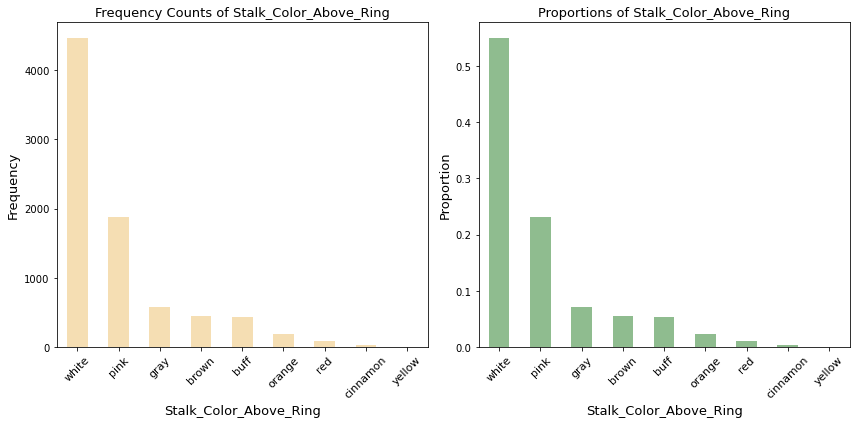

Frequency counts for stalk_color_above_ring:
white       4464
pink        1872
gray         576
brown        448
buff         432
orange       192
red           96
cinnamon      36
yellow         8
Name: stalk_color_above_ring, dtype: int64

Proportions for stalk_color_above_ring:
white       0.5495
pink        0.2304
gray        0.0709
brown       0.0551
buff        0.0532
orange      0.0236
red         0.0118
cinnamon    0.0044
yellow      0.0010
Name: stalk_color_above_ring, dtype: float64


In [33]:
# Calculating frequency counts for stalk_color_above_ring:
stalk_color_above_ring_counts = df['stalk_color_above_ring'].value_counts()

# Calculating proportions for stalk_color_above_ring:
stalk_color_above_ring_proportions = df['stalk_color_above_ring'].value_counts(normalize=True).round(4)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for stalk_color_above_ring:
stalk_color_above_ring_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Stalk_Color_Above_Ring', fontsize=13)
axes[0].set_xlabel('Stalk_Color_Above_Ring', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for stalk_color_above_ring:
stalk_color_above_ring_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Stalk_Color_Above_Ring', fontsize=13)
axes[1].set_xlabel('Stalk_Color_Above_Ring', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for stalk_color_above_ring:
print("Frequency counts for stalk_color_above_ring:")
print(stalk_color_above_ring_counts)
print("\nProportions for stalk_color_above_ring:")
print(stalk_color_above_ring_proportions)

##### Observations:

- *white* makes up approximately 55% of the total data, making it the most prevalent color.

- *pink* represents around 23% of the data, followed by *gray* (7%), *brown* (5.5%), *buff* (5%), *orange* (2%), *red* (1%), *cinnamon* (0.4%), and *yellow* (0.10%).

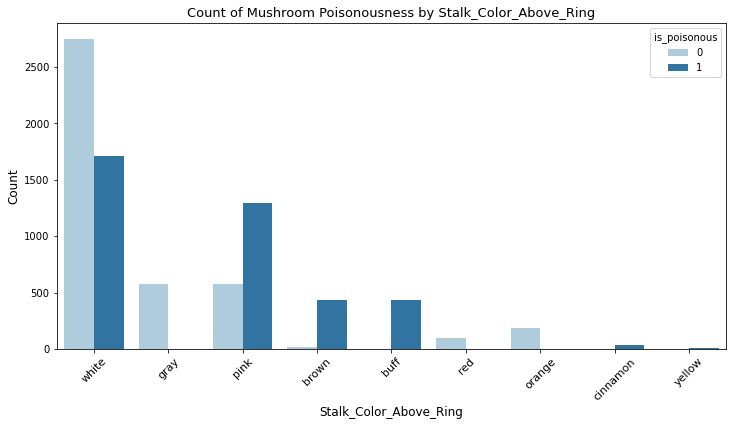


Frequency count of poisonousness within each stalk_color_above_ring group:
is_poisonous               0     1
stalk_color_above_ring            
brown                     16   432
buff                       0   432
cinnamon                   0    36
gray                     576     0
orange                   192     0
pink                     576  1296
red                       96     0
white                   2752  1712
yellow                     0     8

Proportions of poisonousness within each stalk_color_above_ring group:
is_poisonous               0     1
stalk_color_above_ring            
brown                   0.04  0.96
buff                    0.00  1.00
cinnamon                0.00  1.00
gray                    1.00  0.00
orange                  1.00  0.00
pink                    0.31  0.69
red                     1.00  0.00
white                   0.62  0.38
yellow                  0.00  1.00


In [34]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(12, 6))

# Plotting countplot with the paired color palette:
sns.countplot(x='stalk_color_above_ring', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Stalk_Color_Above_Ring', fontsize=13)
plt.xlabel('Stalk_Color_Above_Ring', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
stalk_color_above_ring_poison_counts = df.groupby(['stalk_color_above_ring', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each stalk_color_above_ring group:")
print(stalk_color_above_ring_poison_counts)

stalk_color_above_ring_poison_proportions = stalk_color_above_ring_poison_counts.div(stalk_color_above_ring_poison_counts.sum(axis=1), axis=0)
stalk_color_above_ring_poison_proportions = stalk_color_above_ring_poison_proportions.round(2)

print("\nProportions of poisonousness within each stalk_color_above_ring group:")
print(stalk_color_above_ring_poison_proportions)

##### Observations:

- *brown*, *buff*, *cinnamon*, and *yellow* are exclusively associated with poisonous mushrooms (100% poisonous).

- *gray* and *orange* are exclusively associated with non-poisonous mushrooms (100% non-poisonous).

- *pink* has a higher proportion of poisonous mushrooms (69%) compared to non-poisonous ones (31%).

- *white* predominantly consists of non-poisonous mushrooms (62%), with a substantial proportion being poisonous (38%).

##### Conclusion:

- The distribution of mushrooms across different stalk colors shows a bias towards *white*, *pink*, and *gray*, which collectively represent over 85% of the data.

- *brown*, *buff*, *cinnamon*, and *yellow* indicate class imbalance towards poisonous mushrooms, while *gray* and *orange* colors show class imbalance towards non-poisonous mushrooms.

- *pink* and *white* have relatively balanced proportions of poisonous and non-poisonous mushrooms, but still indicate a class imbalance 

- *stalk_color_above_ring* appears to be an important feature in predicting mushroom toxicity.  



##### 14. stalk_color_below_ring       

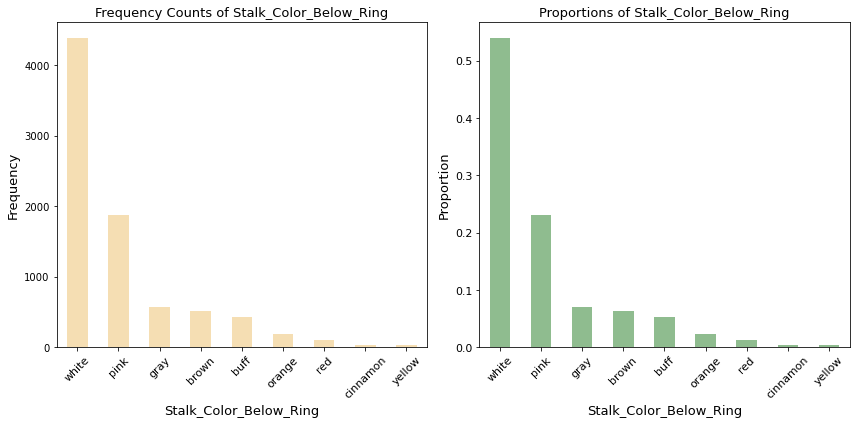

Frequency counts for stalk_color_below_ring:
white       4384
pink        1872
gray         576
brown        512
buff         432
orange       192
red           96
cinnamon      36
yellow        24
Name: stalk_color_below_ring, dtype: int64

Proportions for stalk_color_below_ring:
white       0.5396
pink        0.2304
gray        0.0709
brown       0.0630
buff        0.0532
orange      0.0236
red         0.0118
cinnamon    0.0044
yellow      0.0030
Name: stalk_color_below_ring, dtype: float64


In [35]:
# Calculating frequency counts for stalk_color_below_ring:
stalk_color_below_ring_counts = df['stalk_color_below_ring'].value_counts()

# Calculating proportions for stalk_color_below_ring:
stalk_color_below_ring_proportions = df['stalk_color_below_ring'].value_counts(normalize=True).round(4)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for stalk_color_below_ring:
stalk_color_below_ring_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Stalk_Color_Below_Ring', fontsize=13)
axes[0].set_xlabel('Stalk_Color_Below_Ring', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for stalk_color_below_ring:
stalk_color_below_ring_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Stalk_Color_Below_Ring', fontsize=13)
axes[1].set_xlabel('Stalk_Color_Below_Ring', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for stalk_color_below_ring:
print("Frequency counts for stalk_color_below_ring:")
print(stalk_color_below_ring_counts)
print("\nProportions for stalk_color_below_ring:")
print(stalk_color_below_ring_proportions)

##### Observations:

- *white* makes up approximately 54% of the total data, making it the most prevalent color.

- *pink* color represents around 23% of the data, followed by *gray* (7%), *brown* (6%), *buff* (5%), *orange* (2%), *red* (1%), *cinnamon* (0.4%), and *yellow* (0.3%).


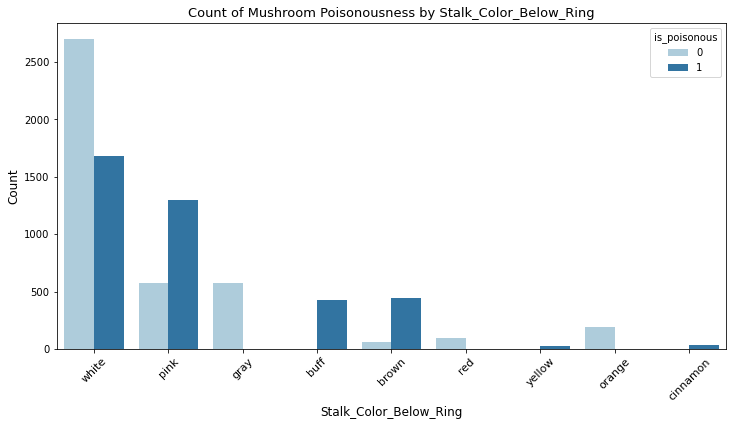


Frequency count of poisonousness within each stalk_color_below_ring group:
is_poisonous               0     1
stalk_color_below_ring            
brown                     64   448
buff                       0   432
cinnamon                   0    36
gray                     576     0
orange                   192     0
pink                     576  1296
red                       96     0
white                   2704  1680
yellow                     0    24

Proportions of poisonousness within each stalk_color_below_ring group:
is_poisonous               0     1
stalk_color_below_ring            
brown                   0.12  0.88
buff                    0.00  1.00
cinnamon                0.00  1.00
gray                    1.00  0.00
orange                  1.00  0.00
pink                    0.31  0.69
red                     1.00  0.00
white                   0.62  0.38
yellow                  0.00  1.00


In [36]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(12, 6))

# Plotting countplot with the paired color palette:
sns.countplot(x='stalk_color_below_ring', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Stalk_Color_Below_Ring', fontsize=13)
plt.xlabel('Stalk_Color_Below_Ring', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
stalk_color_below_ring_poison_counts = df.groupby(['stalk_color_below_ring', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each stalk_color_below_ring group:")
print(stalk_color_below_ring_poison_counts)

stalk_color_below_ring_poison_proportions = stalk_color_below_ring_poison_counts.div(stalk_color_below_ring_poison_counts.sum(axis=1), axis=0)
stalk_color_below_ring_poison_proportions = stalk_color_below_ring_poison_proportions.round(2)

print("\nProportions of poisonousness within each stalk_color_below_ring group:")
print(stalk_color_below_ring_poison_proportions)

##### Observations:

- *brown*, *buff*, *cinnamon*, and *yellow* are exclusively associated with poisonous mushrooms (100% poisonous).

- *gray* and *orange* are exclusively associated with non-poisonous mushrooms (100% non-poisonous).

- *pink* has a higher proportion of poisonous mushrooms (69%) compared to non-poisonous ones (31%).

- *white* predominantly consists of non-poisonous mushrooms (62%), with a substantial proportion being poisonous (38%).

##### Conclusion: 

 - The distribution of mushrooms across different colors shows a bias towards *white*, *pink*, and *gray*, which collectively represent over 85% of the data.

- *brown*, *buff*, *cinnamon*, and *yellow* indicate class imbalance towards poisonous mushrooms, while *gray* and *orange* colors show class imbalance towards non-poisonous mushrooms.

- *pink* and *white* have relatively balanced proportions of poisonous and non-poisonous mushrooms, but still indicate class imbalance.

- *stalk_color_below_ring* appears to be an important feature in predicting mushroom toxicity. 

##### 15. veil_type                    

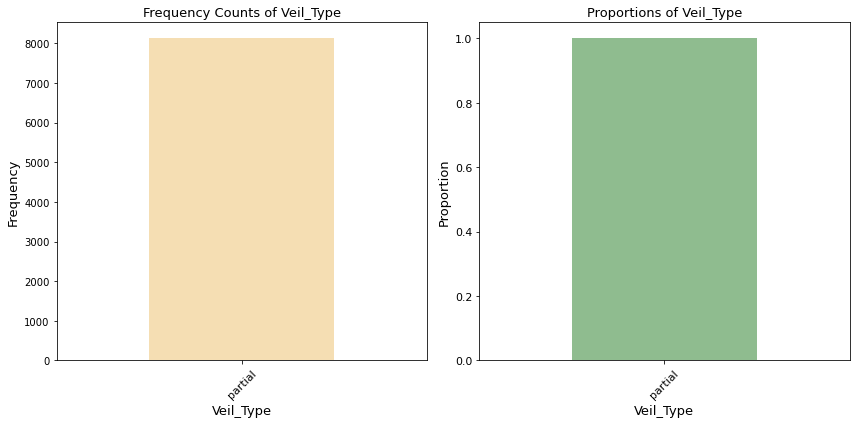

Frequency counts for veil_type:
partial    8124
Name: veil_type, dtype: int64

Proportions for veil_type:
partial    1.0
Name: veil_type, dtype: float64


In [37]:
# Calculating frequency counts for veil_type:
veil_type_counts = df['veil_type'].value_counts()

# Calculating proportions for veil_type:
veil_type_proportions = df['veil_type'].value_counts(normalize=True)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for veil_type:
veil_type_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Veil_Type', fontsize=13)
axes[0].set_xlabel('Veil_Type', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for veil_type:
veil_type_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Veil_Type', fontsize=13)
axes[1].set_xlabel('Veil_Type', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for veil_type:
print("Frequency counts for veil_type:")
print(veil_type_counts)
print("\nProportions for veil_type:")
print(veil_type_proportions)

##### Observations:

- The *partial* veil type represents the entirety of the dataset, making up 100% of the total data.

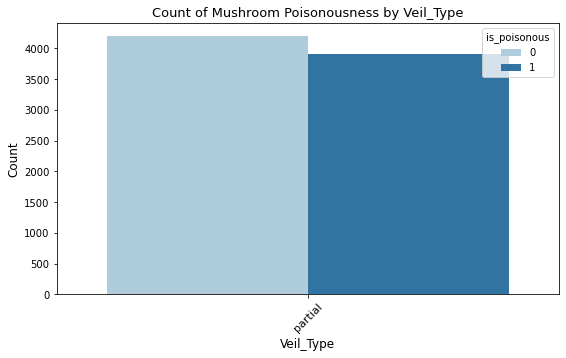


Frequency count of poisonousness within each veil_type group:
is_poisonous     0     1
veil_type               
partial       4208  3916

Proportions of poisonousness within each veil_type group:
is_poisonous     0     1
veil_type               
partial       0.52  0.48


In [38]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='veil_type', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Veil_Type', fontsize=13)
plt.xlabel('Veil_Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
veil_type_poison_counts = df.groupby(['veil_type', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each veil_type group:")
print(veil_type_poison_counts)

veil_type_poison_proportions = veil_type_poison_counts.div(veil_type_poison_counts.sum(axis=1), axis=0)
veil_type_poison_proportions = veil_type_poison_proportions.round(2)

print("\nProportions of poisonousness within each veil_type group:")
print(veil_type_poison_proportions)

##### Observations:

- 52% of mushrooms with a 'partial' veil type are non-poisonous.

- 48% of mushrooms with a 'partial' veil type are poisonous.

##### Conclusion: 

- There is no representation bias within the *veil_type* variable since all mushrooms have a *partial* veil type.

- The *partial* veil type exhibits a balanced distribution of poisonous and non-poisonous mushrooms.

- While *veil_type* does not seem to be a significant factor for predicting mushroom toxicity in this dataset, we will still consider in the overall analysis.

##### 16. veil_color                   

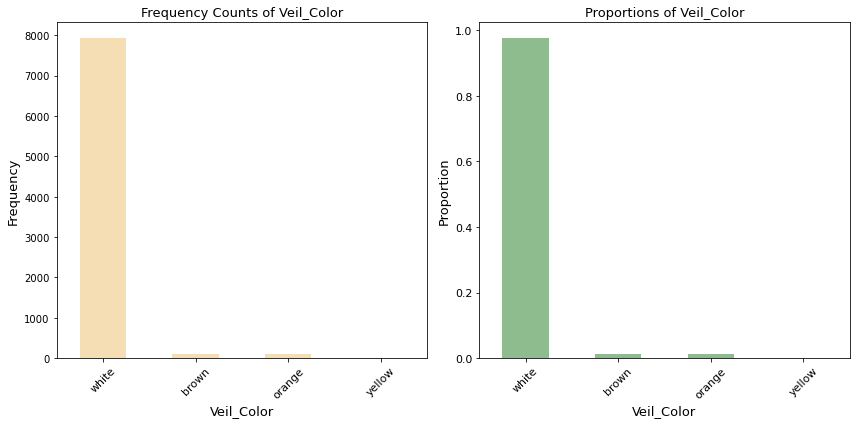

Frequency counts for veil_color:
white     7924
brown       96
orange      96
yellow       8
Name: veil_color, dtype: int64

Proportions for veil_color:
white     0.9754
brown     0.0118
orange    0.0118
yellow    0.0010
Name: veil_color, dtype: float64


In [39]:
# Calculating frequency counts for veil_color:
veil_color_counts = df['veil_color'].value_counts()

# Calculating proportions for veil_color:
veil_color_proportions = df['veil_color'].value_counts(normalize=True).round(4)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for veil_color:
veil_color_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Veil_Color', fontsize=13)
axes[0].set_xlabel('Veil_Color', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for veil_color:
veil_color_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Veil_Color', fontsize=13)
axes[1].set_xlabel('Veil_Color', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for veil_color:
print("Frequency counts for veil_color:")
print(veil_color_counts)
print("\nProportions for veil_color:")
print(veil_color_proportions)

##### Observations:

- *white* represents almost 98% of the entire dataset, with *brown* at 1%, *orange* at 1% and *yellow* at 0.1%. 

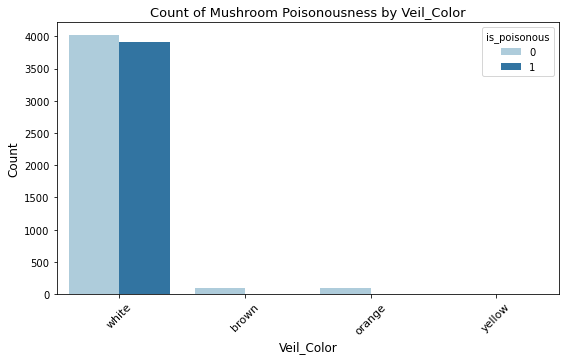


Frequency count of poisonousness within each veil_color group:
is_poisonous     0     1
veil_color              
brown           96     0
orange          96     0
white         4016  3908
yellow           0     8

Proportions of poisonousness within each veil_color group:
is_poisonous     0     1
veil_color              
brown         1.00  0.00
orange        1.00  0.00
white         0.51  0.49
yellow        0.00  1.00


In [40]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='veil_color', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Veil_Color', fontsize=13)
plt.xlabel('Veil_Color', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
veil_color_poison_counts = df.groupby(['veil_color', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each veil_color group:")
print(veil_color_poison_counts)

veil_color_poison_proportions = veil_color_poison_counts.div(veil_color_poison_counts.sum(axis=1), axis=0)
veil_color_poison_proportions = veil_color_poison_proportions.round(2)

print("\nProportions of poisonousness within each veil_color group:")
print(veil_color_poison_proportions)

##### Observations:

- For *brown* and *orange* veil colors, all mushrooms are non-poisonous (100% non-poisonous).

- For *white* veil color, the proportion of non-poisonous mushrooms is slightly higher than poisonous mushrooms (51% non-poisonous, 49% poisonous).

- For *yellow* veil color, all mushrooms are poisonous (100% poisonous).

##### Conclusion:

- The dataset exhibits a significant representation bias towards mushrooms with *white* veil color.

- There is a significant class imbalance within the veil color categories, especially for *brown*, *orange*, and *yellow* colors, where all mushrooms belong to a single class (either poisonous or non-poisonous).

- There is no class imbalance for the *white* veil color, where the proportions are balanced. 

- *veil_color* may not be a strong predictor of mushroom toxicity due to the imbalance in the dataset and the predominance of one color category, but we will still consider it in the overall analysis. 

##### 17. number_of_rings              

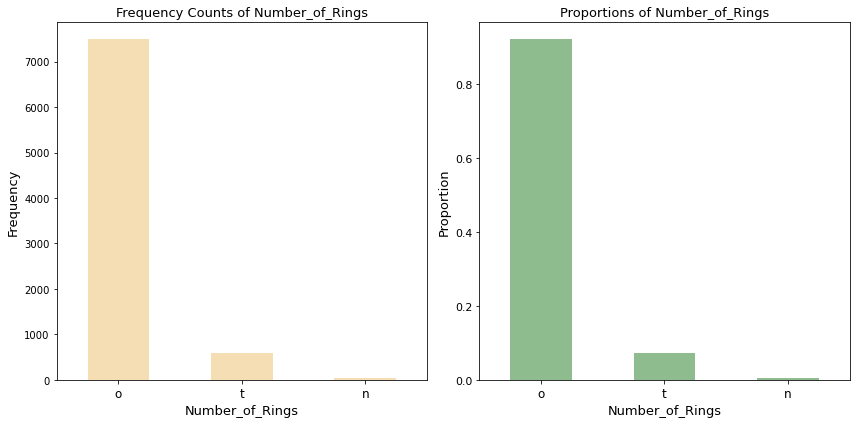

Frequency counts for number_of_rings:
o    7488
t     600
n      36
Name: number_of_rings, dtype: int64

Proportions for number_of_rings:
o    0.9217
t    0.0739
n    0.0044
Name: number_of_rings, dtype: float64


In [41]:
# Calculating frequency counts for number_of_rings:
number_of_rings_counts = df['number_of_rings'].value_counts()

# Calculating proportions for number_of_rings:
number_of_rings_proportions = df['number_of_rings'].value_counts(normalize=True).round(4)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for number_of_rings:
number_of_rings_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Number_of_Rings', fontsize=13)
axes[0].set_xlabel('Number_of_Rings', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', labelsize=12, rotation=360)

# Plotting proportions for number_of_rings:
number_of_rings_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Number_of_Rings', fontsize=13)
axes[1].set_xlabel('Number_of_Rings', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', labelsize=12, rotation=360)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for number_of_rings:
print("Frequency counts for number_of_rings:")
print(number_of_rings_counts)
print("\nProportions for number_of_rings:")
print(number_of_rings_proportions)

##### Observations:

- one ring (*o*) makes up approximately 92% of the entire dataset, with two rings (*t*) at 7% and no ring (*n*) at 0.4%. 

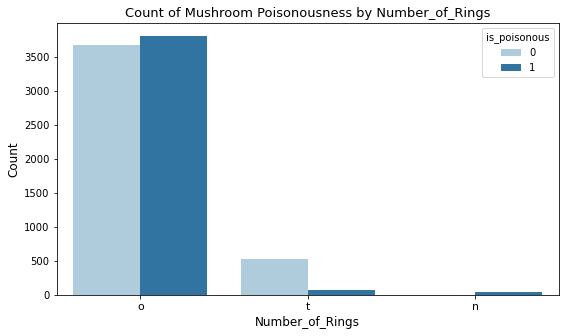


Frequency count of poisonousness within each number_of_rings group:
is_poisonous        0     1
number_of_rings            
n                   0    36
o                3680  3808
t                 528    72

Proportions of poisonousness within each number_of_rings group:
is_poisonous        0     1
number_of_rings            
n                0.00  1.00
o                0.49  0.51
t                0.88  0.12


In [42]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='number_of_rings', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Number_of_Rings', fontsize=13)
plt.xlabel('Number_of_Rings', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
number_of_rings_poison_counts = df.groupby(['number_of_rings', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each number_of_rings group:")
print(number_of_rings_poison_counts)

number_of_rings_poison_proportions = number_of_rings_poison_counts.div(number_of_rings_poison_counts.sum(axis=1), axis=0)
number_of_rings_poison_proportions = number_of_rings_poison_proportions.round(2)

print("\nProportions of poisonousness within each number_of_rings group:")
print(number_of_rings_poison_proportions)

##### Observations:

- For mushrooms with no ring (*n*), all mushrooms are poisonous (100% poisonous).

- For mushrooms with one ring (*o*), the proportion of poisonous mushrooms is slightly higher than non-poisonous mushrooms (51% poisonous, 49% non-poisonous).

- For mushrooms with two rings (*t*), the majority are non-poisonous mushrooms (88% non-poisonous, 12% poisonous).

##### Conclusion:

- The dataset exhibits a significant representation bias towards mushrooms with one ring (*o*).

- There is a notable class imbalance within the number of rings categories, specifically for mushrooms with no ring (*n*) and those with two rings (*t*), where one class predominates.

- There is no class imbalance for the one ring that rules them all (*o*), where the proportions are almost perfectly split. 

- *number_of_rings* appears to be a relevant factor in predicting mushroom toxicity. 

##### 18. ring_type                    

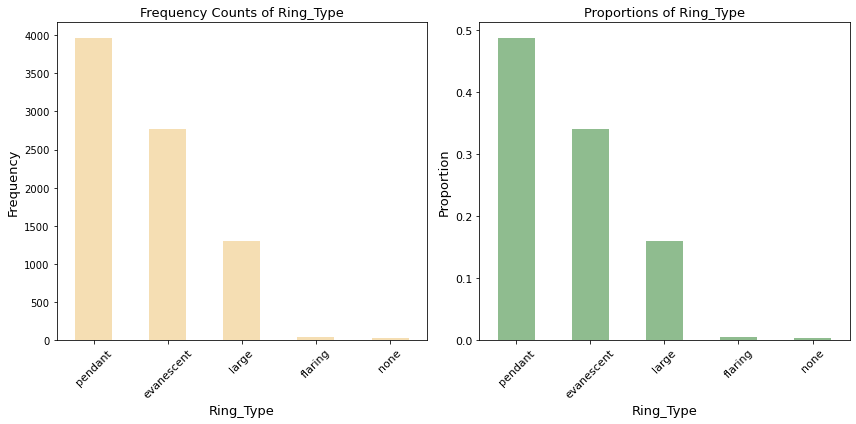

Frequency counts for ring_type:
pendant       3968
evanescent    2776
large         1296
flaring         48
none            36
Name: ring_type, dtype: int64

Proportions for ring_type:
pendant       0.4884
evanescent    0.3417
large         0.1595
flaring       0.0059
none          0.0044
Name: ring_type, dtype: float64


In [43]:
# Calculating frequency counts for ring_type:
ring_type_counts = df['ring_type'].value_counts()

# Calculating proportions for ring_type:
ring_type_proportions = df['ring_type'].value_counts(normalize=True).round(4)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for ring_type:
ring_type_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Ring_Type', fontsize=13)
axes[0].set_xlabel('Ring_Type', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for ring_type:
ring_type_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Ring_Type', fontsize=13)
axes[1].set_xlabel('Ring_Type', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for ring_type:
print("Frequency counts for ring_type:")
print(ring_type_counts)
print("\nProportions for ring_type:")
print(ring_type_proportions)

##### Observations:

- *pendant* ring type makes up 48.84% of the total data, making it the most prevalent ring type.

- *evanescent* ring type represents around 34.17% of the data, followed by *large* (15.95%), *flaring* (0.59%), and *none* (0.44%). 

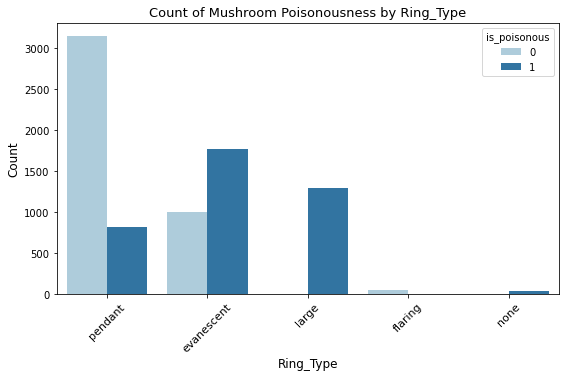


Frequency count of poisonousness within each ring_type group:
is_poisonous     0     1
ring_type               
evanescent    1008  1768
flaring         48     0
large            0  1296
none             0    36
pendant       3152   816

Proportions of poisonousness within each ring_type group:
is_poisonous     0     1
ring_type               
evanescent    0.36  0.64
flaring       1.00  0.00
large         0.00  1.00
none          0.00  1.00
pendant       0.79  0.21


In [44]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(9, 5))

# Plotting countplot with the paired color palette:
sns.countplot(x='ring_type', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Ring_Type', fontsize=13)
plt.xlabel('Ring_Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
ring_type_poison_counts = df.groupby(['ring_type', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each ring_type group:")
print(ring_type_poison_counts)

ring_type_poison_proportions = ring_type_poison_counts.div(ring_type_poison_counts.sum(axis=1), axis=0)
ring_type_poison_proportions = ring_type_poison_proportions.round(2)

print("\nProportions of poisonousness within each ring_type group:")
print(ring_type_poison_proportions)

##### Observations: 

- *evanescent* ring type has a higher proportion of poisonous mushrooms (64%) compared to non-poisonous ones (36%).

- *flaring* and *none* ring types are exclusively associated with non-poisonous mushrooms (100% non-poisonous).

- *large* ring type is exclusively associated with poisonous mushrooms (100% poisonous).

- *pendant* ring type predominantly consists of non-poisonous mushrooms (79%), with a smaller proportion being poisonous (21%).

###### Conclusion:

-  The distribution of mushrooms across different ring types shows a bias towards *pendant* and *evanescent* types, which collectively represent over 82% of the data.

- *flaring*, *large* and *none* ring types indicate extreme class imbalances where the categories fall exclusively into one class.

-   *evanescent* ring type exhibits a significant class imbalance towards poisonous mushrooms, while *pendant* ring type shows a significant class imbalance towards non-poisonous mushrooms.

- *ring_type* appears to be an important feature in predicting mushroom toxicity.

###### 19. spore_print_color            

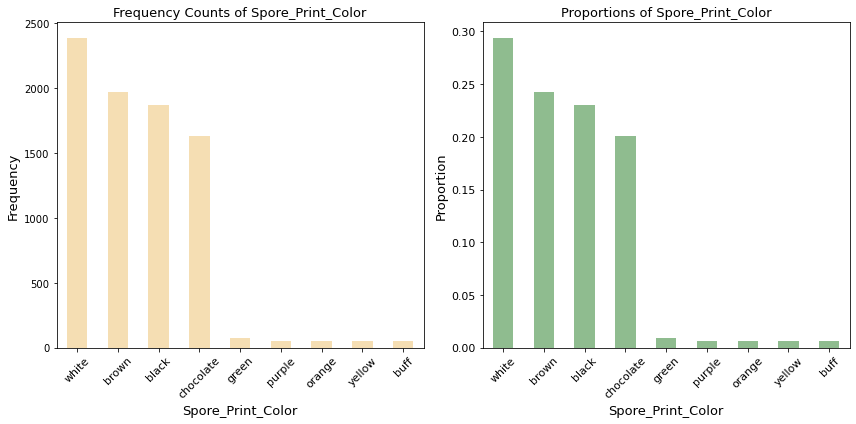

Frequency counts for spore_print_color:
white        2388
brown        1968
black        1872
chocolate    1632
green          72
purple         48
orange         48
yellow         48
buff           48
Name: spore_print_color, dtype: int64

Proportions for spore_print_color:
white        0.2939
brown        0.2422
black        0.2304
chocolate    0.2009
green        0.0089
purple       0.0059
orange       0.0059
yellow       0.0059
buff         0.0059
Name: spore_print_color, dtype: float64


In [45]:
# Calculating frequency counts for spore_print_color:
spore_print_color_counts = df['spore_print_color'].value_counts()

# Calculating proportions for spore_print_color:
spore_print_color_proportions = df['spore_print_color'].value_counts(normalize=True).round(4)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for spore_print_color:
spore_print_color_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Spore_Print_Color', fontsize=13)
axes[0].set_xlabel('Spore_Print_Color', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for spore_print_color:
spore_print_color_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Spore_Print_Color', fontsize=13)
axes[1].set_xlabel('Spore_Print_Color', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for spore_print_color:
print("Frequency counts for spore_print_color:")
print(spore_print_color_counts)
print("\nProportions for spore_print_color:")
print(spore_print_color_proportions)

###### Observations:

- *white* spore print color makes up approximately 29% of the total data, making it the most prevalent.

- *brown*, *black*, and *chocolate* each contribute to around 24-25% of the data.

- *green*, *purple*, *orange*, *yellow*, and *buff* each have very low proportions, less than 1%.


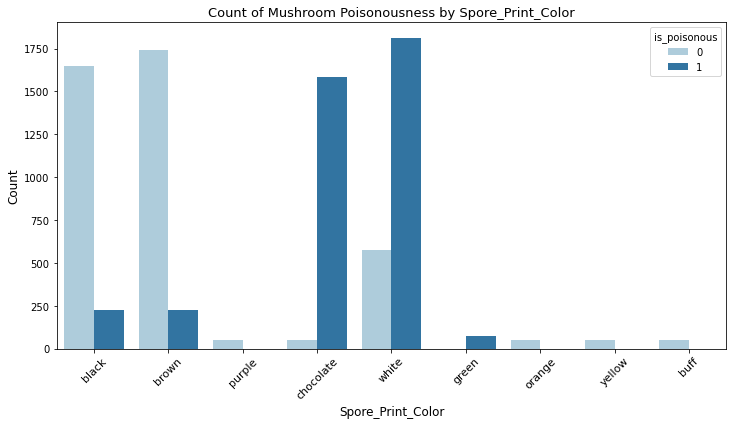


Frequency count of poisonousness within each spore_print_color group:
is_poisonous          0     1
spore_print_color            
black              1648   224
brown              1744   224
buff                 48     0
chocolate            48  1584
green                 0    72
orange               48     0
purple               48     0
white               576  1812
yellow               48     0

Proportions of poisonousness within each spore_print_color group:
is_poisonous          0     1
spore_print_color            
black              0.88  0.12
brown              0.89  0.11
buff               1.00  0.00
chocolate          0.03  0.97
green              0.00  1.00
orange             1.00  0.00
purple             1.00  0.00
white              0.24  0.76
yellow             1.00  0.00


In [46]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(12, 6))

# Plotting countplot with the paired color palette:
sns.countplot(x='spore_print_color', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Spore_Print_Color', fontsize=13)
plt.xlabel('Spore_Print_Color', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
spore_print_color_poison_counts = df.groupby(['spore_print_color', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each spore_print_color group:")
print(spore_print_color_poison_counts)

spore_print_color_poison_proportions = spore_print_color_poison_counts.div(spore_print_color_poison_counts.sum(axis=1), axis=0)
spore_print_color_poison_proportions = spore_print_color_poison_proportions.round(2)

print("\nProportions of poisonousness within each spore_print_color group:")
print(spore_print_color_poison_proportions)

##### Observations:

- *chocolate* spore print color has the highest proportion of poisonous mushrooms (97%) compared to non-poisonous ones (3%).

- *green* spore print color is exclusively associated with poisonous mushrooms (100% poisonous).

- *white* spore print color also has a high proportion of poisonous mushrooms (76%) compared to non-poisonous ones (24%).

- *black* and *brown* spore print colors show relatively balanced proportions, with both having around 11-12% poisonous mushrooms.

- *orange*, *yellow*, *purple*, and *buff* spore print colors are exclusively associated with non-poisonous mushrooms (100% non-poisonous).

##### Conclusion:

- The distribution of mushrooms across different spore print colors is not uniform, indicating representation bias. *white*, *brown*, *black*, and *chocolate* are more prevalent, while *green*, *purple*, *orange, *yellow*, and *buff* are rare.

- *buff*, *green*, *orange*, *purple*, and *yellow* exhibit extreme class imbalance, where the categories fall exclusively into one class. 

- *black* and *brown* have significant class imbalance towards non-poisonous mushrooms.

- *white* has a signficant class imbalance twoards poisonous mushrooms.

- *spore_print_color* appears to be an important feature in predicting mushroom toxicity.

##### 20. population                   

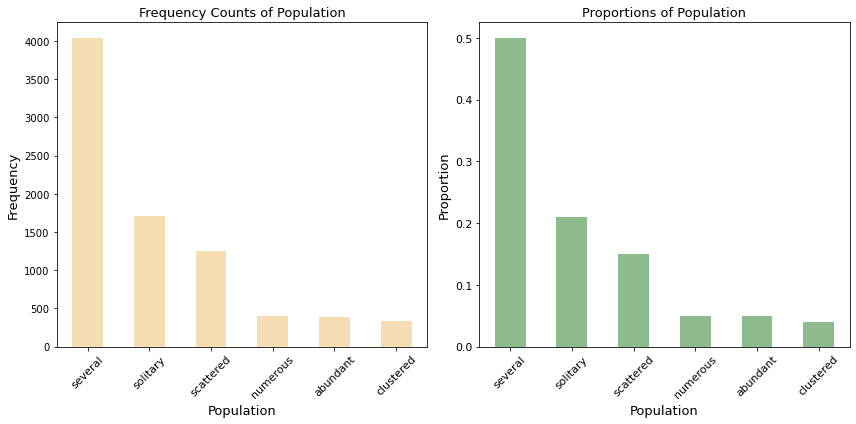

Frequency counts for population:
several      4040
solitary     1712
scattered    1248
numerous      400
abundant      384
clustered     340
Name: population, dtype: int64

Proportions for population:
several      0.50
solitary     0.21
scattered    0.15
numerous     0.05
abundant     0.05
clustered    0.04
Name: population, dtype: float64


In [47]:
# Calculating frequency counts for population:
population_counts = df['population'].value_counts()

# Calculating proportions for population:
population_proportions = df['population'].value_counts(normalize=True).round(2)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for population:
population_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Population', fontsize=13)
axes[0].set_xlabel('Population', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for population:
population_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Population', fontsize=13)
axes[1].set_xlabel('Population', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for population:
print("Frequency counts for population:")
print(population_counts)
print("\nProportions for population:")
print(population_proportions)

##### Observations:

- *several* constitutes approximately 50% of the total data, making it the most prevalent.

- *solitary* represents around 21% of the data, followed by *scattered* (15%) and *numerous* and *abundant* (both 5%).

- *clustered* has the lowest proportion, around 4%.

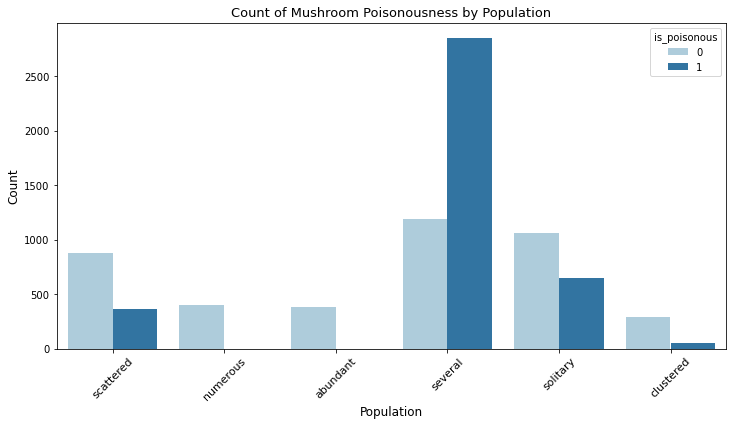


Frequency count of poisonousness within each population group:
is_poisonous     0     1
population              
abundant       384     0
clustered      288    52
numerous       400     0
scattered      880   368
several       1192  2848
solitary      1064   648

Proportions of poisonousness within each population group:
is_poisonous     0     1
population              
abundant      1.00  0.00
clustered     0.85  0.15
numerous      1.00  0.00
scattered     0.71  0.29
several       0.30  0.70
solitary      0.62  0.38


In [48]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(12, 6))

# Plotting countplot with the paired color palette:
sns.countplot(x='population', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Population', fontsize=13)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
population_poison_counts = df.groupby(['population', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each population group:")
print(population_poison_counts)

population_poison_proportions = population_poison_counts.div(population_poison_counts.sum(axis=1), axis=0)
population_poison_proportions = population_poison_proportions.round(2)

print("\nProportions of poisonousness within each population group:")
print(population_poison_proportions)

##### Observations:

- *several* has a higher proportion of poisonous mushrooms (70%) compared to non-poisonous ones (30%).

- *solitary* and *scattered* have higher proportions of non-poisonous mushrooms (62% and 71%, respectively).  

- *clustered* has a higher proportion of non-poisonous mushrooms (85%) compared to poisonous ones (15%).

- *numerous* and *abundant* are exclusively associated with non-poisonous mushrooms (100% non-poisonous).

##### Conclusion:

- There is representation bias with *several* making up 50% of the dataset, while *clustered* constituting only 4% of the dataset.

- *several* exhibits a significant class imbalance towards poisonous mushrooms, *solitary*, *scattered*, and *clustered* exhibit a significant class imbalance towards non-poisonous mushrooms, while *numerous* and *absundant* indicate extreme class imbalance. 

- *population_type* appears to be an important feature in predicting mushroom toxicity.

##### 21. habitat                      

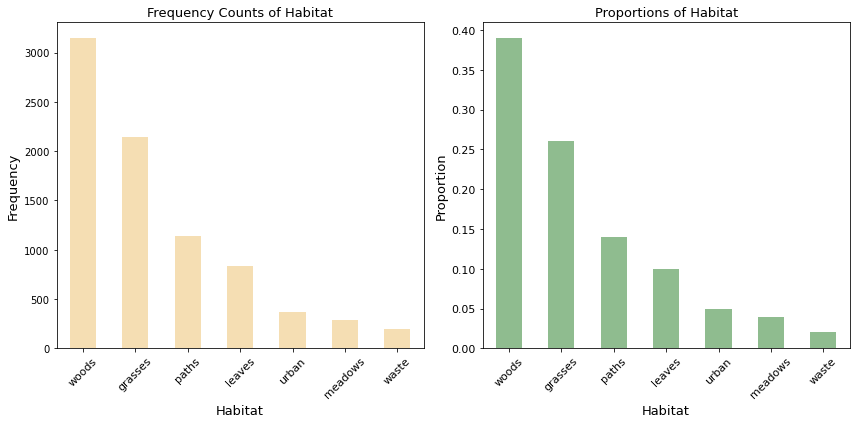

Frequency counts for habitat:
woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: habitat, dtype: int64

Proportions for habitat:
woods      0.39
grasses    0.26
paths      0.14
leaves     0.10
urban      0.05
meadows    0.04
waste      0.02
Name: habitat, dtype: float64


In [49]:
# Calculating frequency counts for habitat:
habitat_counts = df['habitat'].value_counts()

# Calculating proportions for habitat:
habitat_proportions = df['habitat'].value_counts(normalize=True).round(2)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for habitat:
habitat_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Habitat', fontsize=13)
axes[0].set_xlabel('Habitat', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)

# Plotting proportions for habitat:
habitat_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Habitat', fontsize=13)
axes[1].set_xlabel('Habitat', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for habitat:
print("Frequency counts for habitat:")
print(habitat_counts)
print("\nProportions for habitat:")
print(habitat_proportions)

##### Observations:

- *woods* and *grasses* collectively make up 65% of the entire dataset.

- *paths* and *leaves* collectively make up 24% of the dataset.

- *urban*, *meadows* and *waste* collectively make up 11% of the data set. 

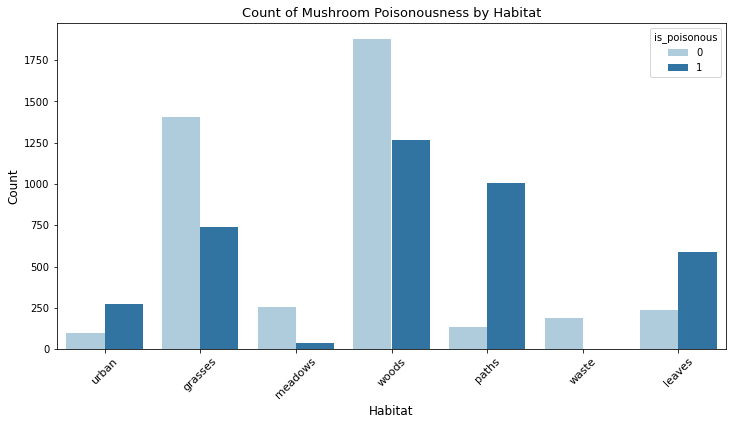


Frequency count of poisonousness within each habitat group:
is_poisonous     0     1
habitat                 
grasses       1408   740
leaves         240   592
meadows        256    36
paths          136  1008
urban           96   272
waste          192     0
woods         1880  1268

Proportions of poisonousness within each habitat group:
is_poisonous     0     1
habitat                 
grasses       0.66  0.34
leaves        0.29  0.71
meadows       0.88  0.12
paths         0.12  0.88
urban         0.26  0.74
waste         1.00  0.00
woods         0.60  0.40


In [50]:
# Getting the paired color palette:
paired_palette = sns.color_palette("Paired")

# Setting the size of the figure:
plt.figure(figsize=(12, 6))

# Plotting countplot with the paired color palette:
sns.countplot(x='habitat', hue='is_poisonous', data=df, palette=paired_palette)

# Adding title and labels:
plt.title('Count of Mushroom Poisonousness by Habitat', fontsize=13)
plt.xlabel('Habitat', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjusting x-axis tick labels:
plt.xticks(fontsize=11, rotation=45)

# Showing plot:
plt.show()

# Calculating and printing values and proportions:
habitat_poison_counts = df.groupby(['habitat', 'is_poisonous']).size().unstack(fill_value=0)
print("\nFrequency count of poisonousness within each habitat group:")
print(habitat_poison_counts)

habitat_poison_proportions = habitat_poison_counts.div(habitat_poison_counts.sum(axis=1), axis=0)
habitat_poison_proportions = habitat_poison_proportions.round(2)

print("\nProportions of poisonousness within each habitat group:")
print(habitat_poison_proportions)

##### Observations:

- *paths*, *leaves*, and *urban* have high proportion of poisonous mushrooms (88%, 71% and 74%, respectively).

- *woods* has a relatively balanced proportion, with 60% poisonous and 40% non-poisonous mushrooms.

- *grasses* also shows a somewhat balanced proportion, with 34% poisonous and 66% non-poisonous mushrooms.

- *meadows* has a small proportion of poisonous mushrooms (12%), with a majority being non-poisonous.


##### Conclusion: 

- There is representation bias in the dataset, with *woods* and *grasses* collectively making up 65% of the entire dataset.

- There is significant class imbalances in the *paths*, *leaves*, *urban* and *meadows* groups. 

- *habitat_type* appears to be an important feature in predicting mushroom toxicity. 

##### 22. is_poisonous                 

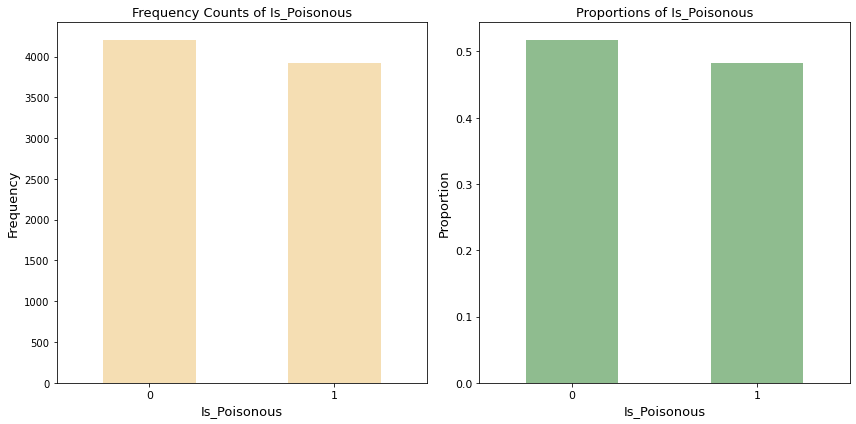

Frequency counts for is_poisonous:
0    4208
1    3916
Name: is_poisonous, dtype: int64

Proportions for is_poisonous:
0    0.517971
1    0.482029
Name: is_poisonous, dtype: float64


In [51]:
# Calculating frequency counts for is_poisonous:
is_poisonous_counts = df['is_poisonous'].value_counts()

# Calculating proportions for is_poisonous:
is_poisonous_proportions = df['is_poisonous'].value_counts(normalize=True)

# Creating a figure and axis object:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting frequency counts for is_poisonous:
is_poisonous_counts.plot(kind='bar', ax=axes[0], color='wheat')
axes[0].set_title('Frequency Counts of Is_Poisonous', fontsize=13)
axes[0].set_xlabel('Is_Poisonous', fontsize=13)
axes[0].set_ylabel('Frequency', fontsize=13)
axes[0].tick_params(axis='x', rotation=360, labelsize=11)

# Plotting proportions for is_poisonous:
is_poisonous_proportions.plot(kind='bar', ax=axes[1], color='darkseagreen')
axes[1].set_title('Proportions of Is_Poisonous', fontsize=13)
axes[1].set_xlabel('Is_Poisonous', fontsize=13)
axes[1].set_ylabel('Proportion', fontsize=13)
axes[1].tick_params(axis='x', rotation= 360, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

# Adjusting layout:
plt.tight_layout()

# Showing plot:
plt.show()

# Printing frequency counts and proportions for is_poisonous:
print("Frequency counts for is_poisonous:")
print(is_poisonous_counts)
print("\nProportions for is_poisonous:")
print(is_poisonous_proportions)

##### Observations:

- The distribution between the two classes is relatively balanced, with class 0 (non-poisonous) having a slightly higher proportion compared to class 1 (poisonous). However, the difference in proportions is not significant, indicating a relatively balanced dataset in terms of the target variable.

##### Feature Engineering

In this section, we will be transforming all of our categorical variables via one-hot encoding. The aim is for our dataset to be entirely made up of binary points. 

In [52]:
# Creating dummy variables:
dummy_1 = pd.get_dummies(df['cap_shape'], prefix = 'cap_shape', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_1], axis=1)

# Dropping the original 'cap_shape' column:
df.drop('cap_shape', axis=1, inplace=True)

# Dropping the dummy variable 'trap_conical':
df.drop('cap_shape_conical', axis=1, inplace=True)

In [53]:
# Creating dummy variables:
dummy_2 = pd.get_dummies(df['cap_surface'], prefix = 'cap_surface', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_2], axis=1)

# Dropping the original column:
df.drop('cap_surface', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('cap_surface_grooves', axis=1, inplace=True)

In [54]:
# Creating dummy variables:
dummy_3 = pd.get_dummies(df['cap_color'], prefix = 'cap_color', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_3], axis=1)

# Dropping the original column:
df.drop('cap_color', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('cap_color_purple', axis=1, inplace=True)

In [55]:
# Creating dummy variables:
dummy_4 = pd.get_dummies(df['has_bruises'], prefix = 'has_bruises', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_4], axis=1)

# Dropping the original column:
df.drop('has_bruises', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('has_bruises_True', axis=1, inplace=True)

In [56]:
# Creating dummy variables:
dummy_5 = pd.get_dummies(df['odor'], prefix = 'odor', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_5], axis=1)

# Dropping the original column:
df.drop('odor', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('odor_musty', axis=1, inplace=True)

In [57]:
# Creating dummy variables:
dummy_6 = pd.get_dummies(df['gill_attachment'], prefix = 'gill_attachment', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_6], axis=1)

# Dropping the original column:
df.drop('gill_attachment', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('gill_attachment_attached', axis=1, inplace=True)

In [58]:
# Creating dummy variables:
dummy_7 = pd.get_dummies(df['gill_spacing'], prefix = 'gill_spacing', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_7], axis=1)

# Dropping the original column:
df.drop('gill_spacing', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('gill_spacing_crowded', axis=1, inplace=True)

In [59]:
# Creating dummy variables:
dummy_8 = pd.get_dummies(df['gill_size'], prefix = 'gill_size', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_8], axis=1)

# Dropping the original column:
df.drop('gill_size', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('gill_size_narrow', axis=1, inplace=True)

In [60]:
# Creating dummy variables:
dummy_9 = pd.get_dummies(df['gill_color'], prefix = 'gill_color', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_9], axis=1)

# Dropping the original column:
df.drop('gill_color', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('gill_color_orange', axis=1, inplace=True)

In [61]:
# Creating dummy variables:
dummy_10 = pd.get_dummies(df['stalk_shape'], prefix = 'stalk_shape', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_10], axis=1)

# Dropping the original column:
df.drop('stalk_shape', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('stalk_shape_enlarging', axis=1, inplace=True)

In [62]:
# Creating dummy variables:
dummy_11 = pd.get_dummies(df['stalk_surface_above_ring'], prefix = 'stalk_surface_above_ring', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_11], axis=1)

# Dropping the original column:
df.drop('stalk_surface_above_ring', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('stalk_surface_above_ring_fibrous', axis=1, inplace=True)

In [63]:
# Creating dummy variables:
dummy_12 = pd.get_dummies(df['stalk_surface_belows_ring'], prefix = 'stalk_surface_belows_ring', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_12], axis=1)

# Dropping the original column:
df.drop('stalk_surface_belows_ring', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('stalk_surface_belows_ring_f', axis=1, inplace=True)

In [64]:
# Creating dummy variables:
dummy_13 = pd.get_dummies(df['stalk_color_above_ring'], prefix = 'stalk_color_above_ring', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_13], axis=1)

# Dropping the original column:
df.drop('stalk_color_above_ring', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('stalk_color_above_ring_yellow', axis=1, inplace=True)

In [65]:
# Creating dummy variables:
dummy_14 = pd.get_dummies(df['stalk_color_below_ring'], prefix = 'stalk_color_below_ring', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_14], axis=1)

# Dropping the original column:
df.drop('stalk_color_below_ring', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('stalk_color_below_ring_cinnamon', axis=1, inplace=True)

In [66]:
# Creating dummy variables:
dummy_15 = pd.get_dummies(df['veil_type'], prefix = 'veil_type', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_15], axis=1)

# Dropping the original column:
df.drop('veil_type', axis=1, inplace=True)

In [67]:
# Creating dummy variables:
dummy_16 = pd.get_dummies(df['veil_color'], prefix = 'veil_color', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_16], axis=1)

# Dropping the original column:
df.drop('veil_color', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('veil_color_orange', axis=1, inplace=True)

In [68]:
# Creating dummy variables:
dummy_17 = pd.get_dummies(df['number_of_rings'], prefix = 'number_of_rings', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_17], axis=1)

# Dropping the original column:
df.drop('number_of_rings', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('number_of_rings_n', axis=1, inplace=True)

In [69]:
# Creating dummy variables:
dummy_18 = pd.get_dummies(df['ring_type'], prefix = 'ring_type', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_18], axis=1)

# Dropping the original column:
df.drop('ring_type', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('ring_type_none', axis=1, inplace=True)

In [70]:
# Creating dummy variables:
dummy_19 = pd.get_dummies(df['spore_print_color'], prefix = 'spore_p_color', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_19], axis=1)

# Dropping the original column:
df.drop('spore_print_color', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('spore_p_color_buff', axis=1, inplace=True)

In [71]:
# Creating dummy variables:
dummy_20 = pd.get_dummies(df['population'], prefix = 'pop', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_20], axis=1)

# Dropping the original column:
df.drop('population', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('pop_abundant', axis=1, inplace=True)

In [72]:
# Creating dummy variables:
dummy_21 = pd.get_dummies(df['habitat'], prefix = 'habitat', dtype=int)

# Concatenating dummy variables with original DataFrame: 
df = pd.concat([df, dummy_21], axis=1)

# Dropping the original column:
df.drop('habitat', axis=1, inplace=True)

# Dropping a dummy variable:
df.drop('habitat_waste', axis=1, inplace=True)

In [73]:
# Checking that all of our data are integers:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 93 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   is_poisonous                     8124 non-null   int64
 1   cap_shape_bell                   8124 non-null   int32
 2   cap_shape_convex                 8124 non-null   int32
 3   cap_shape_flat                   8124 non-null   int32
 4   cap_shape_knobbed                8124 non-null   int32
 5   cap_shape_sunken                 8124 non-null   int32
 6   cap_surface_fibrous              8124 non-null   int32
 7   cap_surface_scaly                8124 non-null   int32
 8   cap_surface_smooth               8124 non-null   int32
 9   cap_color_brown                  8124 non-null   int32
 10  cap_color_buff                   8124 non-null   int32
 11  cap_color_cinnamon               8124 non-null   int32
 12  cap_color_gray                   8124 non-null  

In [74]:
# Checking that all columns have binary data:

for column in df.columns:
    print(column, df[column].unique())

is_poisonous [1 0]
cap_shape_bell [0 1]
cap_shape_convex [1 0]
cap_shape_flat [0 1]
cap_shape_knobbed [0 1]
cap_shape_sunken [0 1]
cap_surface_fibrous [0 1]
cap_surface_scaly [0 1]
cap_surface_smooth [1 0]
cap_color_brown [1 0]
cap_color_buff [0 1]
cap_color_cinnamon [0 1]
cap_color_gray [0 1]
cap_color_green [0 1]
cap_color_pink [0 1]
cap_color_red [0 1]
cap_color_white [0 1]
cap_color_yellow [0 1]
has_bruises_False [0 1]
odor_almond [0 1]
odor_anise [0 1]
odor_creosote [0 1]
odor_fishy [0 1]
odor_foul [0 1]
odor_none [0 1]
odor_pungent [1 0]
odor_spicy [0 1]
gill_attachment_free [1 0]
gill_spacing_close [1 0]
gill_size_broad [0 1]
gill_color_black [1 0]
gill_color_brown [0 1]
gill_color_buff [0 1]
gill_color_chocolate [0 1]
gill_color_gray [0 1]
gill_color_green [0 1]
gill_color_pink [0 1]
gill_color_purple [0 1]
gill_color_red [0 1]
gill_color_white [0 1]
gill_color_yellow [0 1]
stalk_shape_tapering [0 1]
stalk_surface_above_ring_scaly [0 1]
stalk_surface_above_ring_silky [0 1]
stal

##### Represention Bias

Representation bias refers to a situation where certain categories or groups within a dataset are overrepresented or underrepresented compared to their true distribution in the population. Representation bias can affect the validity and generalizability of results obtained from the dataset, as the findings may not accurately reflect the true relationships or patterns present in the population.

The overall representation bias measures the extent to which variables contribute to the dataset. A representation bias close to 0 indicates that each variable contributes relatively equally to the dataset, while higher values suggest that some variables contribute more significantly than others.

In what follows, we will first compute, for each variable, the percentage of how much that variable contributes to the dataset. Then, we will find the overall representation bias, which is a number between 0 and 1.  

In [75]:
total_rows = len(df)

# Creating an empty dictionary to store the percentage contribution of each variable:
variable_contributions = {}

# Iterating over each column (variable) in the dataset:
for col in df.columns:
    # Calculating the percentage contribution of the variable:
    contribution = len(df[df[col] == 1]) / total_rows * 100
    
    # Storing the contribution in the dictionary:
    variable_contributions[col] = contribution

# Converting the dictionary to a DataFrame for easy visualization:
variable_contributions_df = pd.DataFrame.from_dict(variable_contributions, orient='index', columns=['Contribution'])

# Sorting the DataFrame by contribution in descending order:
variable_contributions_df = variable_contributions_df.sort_values(by='Contribution', ascending=False)

# Printing the percentage contribution of each variable to the dataset:
print(variable_contributions_df)

                                Contribution
veil_type_partial                 100.000000
veil_color_white                   97.538159
gill_attachment_free               97.415066
number_of_rings_o                  92.171344
gill_spacing_close                 83.850320
...                                      ...
stalk_color_below_ring_yellow       0.295421
gill_color_green                    0.295421
stalk_surface_above_ring_scaly      0.295421
cap_color_green                     0.196947
veil_color_yellow                   0.098474

[93 rows x 1 columns]


In [76]:
# Calculate the percentage contribution of each variable
variable_contributions = (df.astype(bool).sum() / len(df))

# Calculate the ideal contribution assuming each variable contributes equally
ideal_contribution = 1 / len(df.columns)

# Calculate the absolute differences between each variable's contribution and the ideal contribution
absolute_differences = abs(variable_contributions - ideal_contribution)

# Calculate the overall representation bias (median of absolute differences)
overall_bias = absolute_differences.median()

print("Overall Representation Bias:", overall_bias)

Overall Representation Bias: 0.09165991645621893


##### Observations:

In our case, the overall representation bias is 0.09. This means that, on average, each variable contributes approximately 9% to the dataset. This suggests a relatively balanced distribution of contributions among the variables, which is generally desirable in statistical analysis and modeling.

Again, an overall representation bias of 0.09 is considered quite good, indicating a relatively balanced distribution of variables in our dataset. A low overall representation bias indicates that the dataset is diverse and contains a good representation of different variables, making it more robust for analysis and modeling tasks.

##### Variable Bias

Although we have binary data, assessing variable bias can still be meaningful. The variable bias measures the association between each predictor variable and the target variable. It quantifies how much each variable contributes to the predictive power or imbalance observed in the target variable. A higher variable bias suggests that the variable has a greater influence on the target variable's imbalance, indicating its potential importance or relevance in predictive modeling or analysis. However,  a high variance bias can indicate that the model is overly sensitive to small changes in the training data and may not generalize well to new, unseen data and this could lead to overfitting.

First we will compute, for each variable, the proportions of being in class 0 (non-poisonous) and class 1 (poisnous). We will then take the absolute value of the difference between these proportions to get the varaince bias for each variable. And then we will count how many variable have bias between 0 and 0.4, 0.4 and 0.7, and 0.7 and 1. 

In [77]:
# Creating an empty dictionary to store class imbalance information:
class_imbalance = {}

# Iterating over each column (variable) in the dataset:
for col in df.columns:
    # If the column is the target variable, skip it:
    if col == 'is_poisonous':
        continue
    
    # Calculating the value counts for each class (0 and 1):
    value_counts = df[col].value_counts()
    
    # Calculating the proportion of each class:
    proportion_0 = value_counts.get(0, 0) / len(df)
    proportion_1 = value_counts.get(1, 0) / len(df)
    
    # Storing the class imbalance information in the dictionary:
    class_imbalance[col] = {'Proportion_0': proportion_0, 'Proportion_1': proportion_1}

# Converting the dictionary to a DataFrame for easy visualization:
class_imbalance_df = pd.DataFrame.from_dict(class_imbalance, orient='index')

# Printing the class imbalance information:
print(class_imbalance_df)

                   Proportion_0  Proportion_1
cap_shape_bell         0.944362      0.055638
cap_shape_convex       0.549975      0.450025
cap_shape_flat         0.612014      0.387986
cap_shape_knobbed      0.898080      0.101920
cap_shape_sunken       0.996061      0.003939
...                         ...           ...
habitat_leaves         0.897587      0.102413
habitat_meadows        0.964057      0.035943
habitat_paths          0.859183      0.140817
habitat_urban          0.954702      0.045298
habitat_woods          0.612506      0.387494

[92 rows x 2 columns]


In [78]:
# Creating an empty dictionary to store bias information:
variable_bias = {}

# Iterating over each column (variable) in the dataset:
for col in df.columns:
    # If the column is the target variable, skip it:
    if col == 'is_poisonous':
        continue
    
    # Calculating the value counts for each class (0 and 1):
    value_counts = df[col].value_counts()
    
    # Calculating the proportion of each class:
    proportion_0 = value_counts.get(0, 0) / len(df)
    proportion_1 = value_counts.get(1, 0) / len(df)
    
    # Calculating the bias of the variable:
    bias = abs(proportion_0 - proportion_1)
    
    # Storing the bias information in the dictionary
    variable_bias[col] = bias

# Converting the dictionary to a DataFrame for easy visualization:
variable_bias_df = pd.DataFrame.from_dict(variable_bias, orient='index', columns=['Bias'])

# Sorting the DataFrame by bias in descending order:
variable_bias_df = variable_bias_df.sort_values(by='Bias', ascending=False)

# Printing the variable bias information:
print(variable_bias_df)

                                    Bias
veil_type_partial               1.000000
veil_color_yellow               0.998031
cap_color_green                 0.996061
stalk_color_below_ring_yellow   0.994092
stalk_surface_above_ring_scaly  0.994092
...                                  ...
cap_shape_convex                0.099951
stalk_color_above_ring_white    0.098966
stalk_color_below_ring_white    0.079271
ring_type_pendant               0.023141
pop_several                     0.005416

[92 rows x 1 columns]


In [79]:
# Creating counters for the bias buckets
bias_buckets = {'0 to 0.4': 0, '0.4 to 0.7': 0, '0.7 to 1': 0}

# Iterating over each bias value and counting the variables in each bucket
for bias_value in variable_bias_df['Bias']:
    if bias_value < 0.4:
        bias_buckets['0 to 0.4'] += 1
    elif 0.4 <= bias_value < 0.7:
        bias_buckets['0.4 to 0.7'] += 1
    else:
        bias_buckets['0.7 to 1'] += 1

# Print the count of variables in each bias bucket
for bucket, count in bias_buckets.items():
    print(f'Number of variables with variance bias between {bucket}: {count}')

Number of variables with variance bias between 0 to 0.4: 16
Number of variables with variance bias between 0.4 to 0.7: 20
Number of variables with variance bias between 0.7 to 1: 56


##### Observations:

We have 61% of our predictor variables having high variance bias since they are close to 1. These variables have a strong association with the target variable. They are highly predictive of whether a mushroom is poisonous or non-poisonous. In logistic regression, such variables can be valuable predictors as they contribute significantly to the model's decision-making process. However, high variance biased variables can else result in overfitting.

The variables with biases closer to 0.5 may have less influence on predicting the target variable. While they still contribute to the model, their predictive power might be moderate compared to high bias variables.



### Bivariate Analysis

###### Pearson's $\chi^{2}$ test

Now we will run a Pearson's $\chi^{2}$ test between each predictor variable and the target variable *is_poisonous*. The test will tell us if there is significant association between the predictor variable and the target variable. This will assist us in feature selection by determining which predictors are most relevant for predicting the target variable.

After we run the test, we will determine which variables are not significant at $\alpha$ = 0.5 and we will keep them in mind for later. 

In [80]:
# Importing chi2_contingency function from scipy.stats module
from scipy.stats import chi2_contingency

# Creating an empty DataFrame to store the results for the target variable with all other variables:
target_results = []

# Iterating over each variable (column) except the target variable:
for col in df.columns:
    if col != 'is_poisonous':  # Skip the target variable
        # Creating a contingency table:
        contingency_table = pd.crosstab(df['is_poisonous'], df[col])
        
        # Performing chi-square test of independence:
        chi2, p_value, dof, _ = chi2_contingency(contingency_table)
        
        # Formating p-value without scientific notation and with 7 decimal places:
        formatted_p_value = '{:.7f}'.format(p_value)
        
        # Appending results to list:
        target_results.append({'Variable 1': 'is_poisonous',
                               'Variable 2': col,
                               'P-value': formatted_p_value,
                              })

# Converting results list to DataFrame:
target_results_df = pd.DataFrame(target_results)

# Setting the option to display all rows:
pd.set_option('display.max_rows', None)

# Displaying the results for the target variable with all other variables
print("Results for the target variable 'is_poisonous' with all other variables:")
print(target_results_df)

Results for the target variable 'is_poisonous' with all other variables:
      Variable 1                       Variable 2    P-value
0   is_poisonous                   cap_shape_bell  0.0000000
1   is_poisonous                 cap_shape_convex  0.0163511
2   is_poisonous                   cap_shape_flat  0.0995553
3   is_poisonous                cap_shape_knobbed  0.0000000
4   is_poisonous                 cap_shape_sunken  0.0000001
5   is_poisonous              cap_surface_fibrous  0.0000000
6   is_poisonous                cap_surface_scaly  0.0000000
7   is_poisonous               cap_surface_smooth  0.0000000
8   is_poisonous                  cap_color_brown  0.0000708
9   is_poisonous                   cap_color_buff  0.0000000
10  is_poisonous               cap_color_cinnamon  0.0084191
11  is_poisonous                   cap_color_gray  0.0000317
12  is_poisonous                  cap_color_green  0.0003037
13  is_poisonous                   cap_color_pink  0.0023369
14  is_poiso

In [81]:
# Convert the 'P-value' column to numeric type
target_results_df['P-value'] = target_results_df['P-value'].astype(float)

# Filter the DataFrame to select only insignificant p-values
insignificant_results = target_results_df[target_results_df['P-value'] >= 0.05]

# Display the insignificant results
print("Insignificant results (p-value >= 0.05) for the target variable 'is_poisonous' with all other variables:")
print(insignificant_results)

Insignificant results (p-value >= 0.05) for the target variable 'is_poisonous' with all other variables:
      Variable 1                      Variable 2   P-value
2   is_poisonous                  cap_shape_flat  0.099555
41  is_poisonous  stalk_surface_above_ring_scaly  0.209315
63  is_poisonous               veil_type_partial  1.000000


### Multivariate Analysis

##### Pearson's $\chi^{2}$  without the Target Variable

Now we will run a Pearson's $\chi^{2}$ test without the target variable. That is, we will be testing between predictor variables and seeing which association is significant. This will help in identifying potential multicollinearity issues. 

Afer we have run the Pearson's $\chi^{2}$ test, we will again list all the variables were the association was not significant. We can refer to this list in later parts of our machine learning journey.  

*Note: multicollinearity can still be a concern in logistic regression when dealing with binary variables. In logistic regression, multicollinearity among binary variables can lead to inflated standard errors, which in turn affects the estimation of coefficients. This can make it challenging to interpret the individual effects of the variables on the outcome. Moreover, the presence of multicollinearity in logistic regression can also lead to instability in coefficient estimates and can affect the overall performance of the model, including its predictive accuracy and generalization to new data*.

In [82]:
# Creating an empty DataFrame to store the results for independent variables:
independent_results = []

# Iterating over each pair of independent variables:
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j and col1 != 'is_poisonous' and col2 != 'is_poisonous':  # To avoid including the target variable and duplicate pairs
            # Creating a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            
            # Performing chi-square test of independence
            chi2, p_value, dof, _ = chi2_contingency(contingency_table)
            
            # Appending results to list
            independent_results.append({'Variable 1': col1,
                                        'Variable 2': col2,
                                        
                                        'P-value': p_value,
                                        })

# Converting results list to DataFrame:
independent_results_df = pd.DataFrame(independent_results)

# Ensuring all output is on the same row:

# Creating an empty list to store formatted results:
formatted_results = []

# Iterating over each row in the DataFrame:
for index, row in independent_results_df.iterrows():
    # Formating the output string for each row:
    formatted_result = f"{row['Variable 1']} - {row['Variable 2']}: p-value = {row['P-value']}"
    # Appending the formatted result to the list:
    formatted_results.append(formatted_result)

# Printing the formatted results:
for result in formatted_results:
    print(result)


cap_shape_bell - cap_shape_convex: p-value = 9.5140442179398e-87
cap_shape_bell - cap_shape_flat: p-value = 1.4043347199364784e-67
cap_shape_bell - cap_shape_knobbed: p-value = 3.097346282669833e-13
cap_shape_bell - cap_shape_sunken: p-value = 0.3224636193529676
cap_shape_bell - cap_surface_fibrous: p-value = 2.285578690579694e-16
cap_shape_bell - cap_surface_scaly: p-value = 0.013527846819791809
cap_shape_bell - cap_surface_smooth: p-value = 4.680303582517611e-26
cap_shape_bell - cap_color_brown: p-value = 2.992587331429119e-14
cap_shape_bell - cap_color_buff: p-value = 0.4640264410557877
cap_shape_bell - cap_color_cinnamon: p-value = 0.19889831560174787
cap_shape_bell - cap_color_gray: p-value = 4.668963874410604e-10
cap_shape_bell - cap_color_green: p-value = 0.6701119596589058
cap_shape_bell - cap_color_pink: p-value = 0.20071310090271016
cap_shape_bell - cap_color_red: p-value = 4.252848003724834e-25
cap_shape_bell - cap_color_white: p-value = 4.474424597319088e-81
cap_shape_bell 

pop_solitary - habitat_woods: p-value = 3.463536721921788e-138
habitat_grasses - habitat_leaves: p-value = 4.179489731162476e-74
habitat_grasses - habitat_meadows: p-value = 3.523651969333226e-25
habitat_grasses - habitat_paths: p-value = 9.559362939091013e-106
habitat_grasses - habitat_urban: p-value = 1.1301230321057832e-31
habitat_grasses - habitat_woods: p-value = 0.0
habitat_leaves - habitat_meadows: p-value = 7.453659083834393e-09
habitat_leaves - habitat_paths: p-value = 1.264580553127677e-34
habitat_leaves - habitat_urban: p-value = 5.998715685361715e-11
habitat_leaves - habitat_woods: p-value = 3.760574818212863e-129
habitat_meadows - habitat_paths: p-value = 3.40166539801727e-12
habitat_meadows - habitat_urban: p-value = 0.00026467956605922497
habitat_meadows - habitat_woods: p-value = 3.297426643846839e-43
habitat_paths - habitat_urban: p-value = 3.5005532510481254e-15
habitat_paths - habitat_woods: p-value = 8.642119936919557e-185
habitat_urban - habitat_woods: p-value = 1.

In [83]:
# Convert the 'P-value' column to numeric type
independent_results_df['P-value'] = independent_results_df['P-value'].astype(float)

# Filter the DataFrame to select only insignificant p-values
insignificant_independent_results = independent_results_df[independent_results_df['P-value'] >= 0.05]

# Display the insignificant results
print("\nInsignificant results (p-value >= 0.05) for independent variables:")
for index, row in insignificant_independent_results.iterrows():
    print(f"{row['Variable 1']} - {row['Variable 2']}: p- value = {row['P-value']}")


Insignificant results (p-value >= 0.05) for independent variables:
cap_shape_bell - cap_shape_sunken: p- value = 0.3224636193529676
cap_shape_bell - cap_color_buff: p- value = 0.4640264410557877
cap_shape_bell - cap_color_cinnamon: p- value = 0.19889831560174787
cap_shape_bell - cap_color_green: p- value = 0.6701119596589058
cap_shape_bell - cap_color_pink: p- value = 0.20071310090271016
cap_shape_bell - odor_none: p- value = 1.0
cap_shape_bell - stalk_surface_belows_ring_y: p- value = 0.7317023548969708
cap_shape_bell - stalk_color_above_ring_cinnamon: p- value = 0.27341593668582764
cap_shape_bell - veil_type_partial: p- value = 1.0
cap_shape_bell - veil_color_yellow: p- value = 0.10354726081636605
cap_shape_bell - ring_type_flaring: p- value = 0.17041820795869025
cap_shape_bell - spore_p_color_purple: p- value = 0.17041820795869025
cap_shape_bell - habitat_leaves: p- value = 0.40560432433093907
cap_shape_convex - cap_surface_scaly: p- value = 0.08873847053554582
cap_shape_convex - c

##### Cramer's V with Bias Correction

Let us try and use another method that measures the association between two nominal variables. Since all our data is binary, we could use the Cramer's V method. Cramer's V is a measure of association between two nominal variables, similar to Pearson's correlation coefficient for continuous variables. In the context of our EDA, Cramer's V can help assess the strength of the relationship between each pair of categorical variables.

Cramer's V is a number between 0 and 1. A high Cramer's V value indicates a strong association, while a low value suggests little to no association. Moreover,  if two variables have a high Cramer's V value, it implies that changes in one variable are likely to be associated with changes in the other variable.

We will calculate the Cramer's V value using the formula with the bias correction, since Cramer's V can be highly biased. When it comes to evaluating our model and seeing which variables we might drop, this long list might prove to be helpful.

In [84]:
from scipy.stats import chi2_contingency

def cramers_v_corrected(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    if min((kcorr-1), (rcorr-1)) == 0:
        return np.nan
    else:
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# List to store Cramér's V values for each pair of variables
cramers_v_values = []

# Iterate over each pair of binary variables
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        # Skip the pair if one of the variables is the target variable 'is_poisonous'
        if col1 == 'is_poisonous' or col2 == 'is_poisonous':
            continue
        if i < j:  # To avoid duplicate pairs and comparing a variable with itself
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            # Check for NaN values in the confusion matrix
            if confusion_matrix.isnull().values.any():
                cramers_v_values.append((col1, col2, np.nan))
            else:
                cramers_v_value = cramers_v_corrected(confusion_matrix)
                cramers_v_values.append((col1, col2, cramers_v_value))

# Create a DataFrame to store the Cramér's V values
cramers_v_df = pd.DataFrame(cramers_v_values, columns=['Variable 1', 'Variable 2', 'Cramers V'])

# Display the DataFrame
for index, row in cramers_v_df.iterrows():
    print(f"{row['Variable 1']} - {row['Variable 2']}: {row['Cramers V']}")

cap_shape_bell - cap_shape_convex: 0.218756694841635
cap_shape_bell - cap_shape_flat: 0.19240137637890273
cap_shape_bell - cap_shape_knobbed: 0.08012161054351595
cap_shape_bell - cap_shape_sunken: 0.0
cap_shape_bell - cap_surface_fibrous: 0.09037065268533123
cap_shape_bell - cap_surface_scaly: 0.025053469410854897
cap_shape_bell - cap_surface_smooth: 0.1166147774087164
cap_shape_bell - cap_color_brown: 0.0835763524348851
cap_shape_bell - cap_color_buff: 0.0
cap_shape_bell - cap_color_cinnamon: 0.008947590707900596
cap_shape_bell - cap_color_gray: 0.06822601158608264
cap_shape_bell - cap_color_green: 0.0
cap_shape_bell - cap_color_pink: 0.008855848880301373
cap_shape_bell - cap_color_red: 0.11428254336232073
cap_shape_bell - cap_color_white: 0.2112986709696779
cap_shape_bell - cap_color_yellow: 0.1166682796115161
cap_shape_bell - has_bruises_False: 0.11461244713275058
cap_shape_bell - odor_almond: 0.26099437617116017
cap_shape_bell - odor_anise: 0.26099437617116017
cap_shape_bell - odor

gill_color_buff - stalk_color_above_ring_orange: 0.07910847426207415
gill_color_buff - stalk_color_above_ring_pink: 0.33221371744741257
gill_color_buff - stalk_color_above_ring_red: 0.054329500639659634
gill_color_buff - stalk_color_above_ring_white: 0.050182893662581655
gill_color_buff - stalk_color_below_ring_brown: 0.13373395191984214
gill_color_buff - stalk_color_below_ring_buff: 0.12201367169882064
gill_color_buff - stalk_color_below_ring_gray: 0.14257797534868283
gill_color_buff - stalk_color_below_ring_orange: 0.07910847426207415
gill_color_buff - stalk_color_below_ring_pink: 0.33221371744741257
gill_color_buff - stalk_color_below_ring_red: 0.054329500639659634
gill_color_buff - stalk_color_below_ring_white: 0.03950559056157488
gill_color_buff - stalk_color_below_ring_yellow: 0.022985356854225952
gill_color_buff - veil_type_partial: nan
gill_color_buff - veil_color_brown: 0.054329500639659634
gill_color_buff - veil_color_white: 0.08085386558956911
gill_color_buff - veil_color_ye

##### The Phi Coefficient $\varphi$

The $\varphi$ coefficient, also known as the phi correlation coefficient, is a measure of association for two binary variables. It ranges from -1 to 1, where:

 * 1 indicates a perfect positive association, meaning that both variables tend to have the same value simultaneously.

 * 0 indicates no association between the variables.

 * -1 indicates a perfect negative association, meaning that the variables tend to have opposite values simultaneously.
 
The $\varphi$ coefficient can help assess the strength of relationships between predictor variables. Higher $\varphi$ coefficients indicate stronger associations between variables, which can be useful for feature selection, identifying multicollinearity, and understanding the potential impact of predictor variables on the target variable. Also, variables with higher $\varphi$ coefficients may be more informative for predicting the target variable, which in our case, is mushroom toxicity. 

Since there are too many variables to display on a heatmap, our heatmaps will on exhibit the top 15 variables with the highest.  The threshold of the $\varphi$ coefficient depends on many factors, including the field in which your analysis is in. Since our dataset is in biology, a good threshold is at 0.7. Thus, for our case, any variable whose $\varphi$ coefficient is greater than 0.7 will be considered to have very high association with the other variable.

we will run two heatmaps: one which includes the target varaible 'is_poisonous' and one which does not. Including the target variable will provide a comprehensive overview of the relationships among all variables in our dataset. Excluding the target variable will help us understand the relationships among the predictor variables. 


#####  Heat Map of Top 15 Highest $\varphi$ Coefficients (analysis includes 'is_poisonous') 

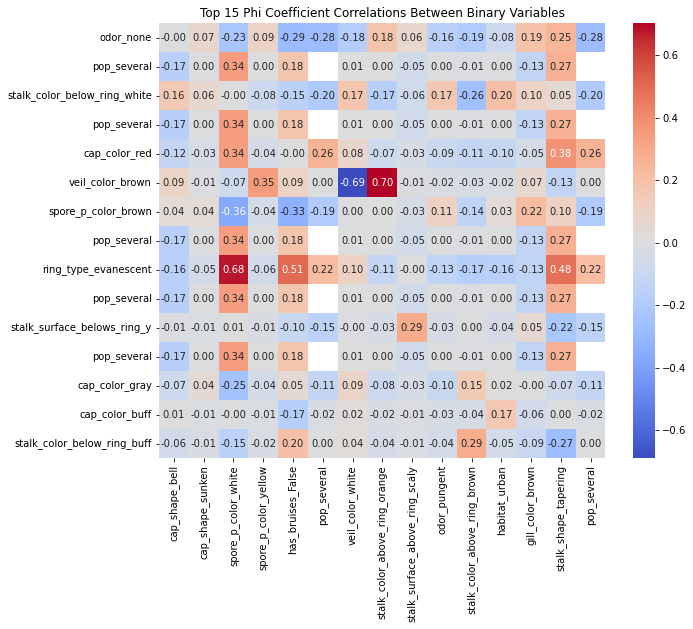

In [85]:
# Creating function to compute phi coefficient:
def phi_coefficient(x, y):
    n11 = np.sum((x == 1) & (y == 1))
    n10 = np.sum((x == 1) & (y == 0))
    n01 = np.sum((x == 0) & (y == 1))
    n00 = np.sum((x == 0) & (y == 0))
    
    # Handle division by zero
    if (n11 + n10) * (n11 + n01) * (n10 + n00) * (n01 + n00) == 0:
        return np.nan
    
    phi = (n11 * n00 - n10 * n01) / np.sqrt((n11 + n10) * (n11 + n01) * (n10 + n00) * (n01 + n00))
    return phi

# Computing the phi coefficient correlation matrix:
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr_matrix.iloc[i, j] = phi_coefficient(df.iloc[:, i], df.iloc[:, j])
        corr_matrix.iloc[j, i] = corr_matrix.iloc[i, j]

# Extracting the top N correlations:
top_corr = (corr_matrix.abs().unstack().sort_values(kind="quicksort").drop_duplicates())[1:16]

# Extracting the variable pairs from the index:
top_corr_index = [pair for pair in top_corr.index]

# Extracting variables from MultiIndex
variable1 = [pair[0] for pair in top_corr_index]
variable2 = [pair[1] for pair in top_corr_index]

# Creating a heatmap for the top correlations:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[variable1, variable2], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 15 Phi Coefficient Correlations Between Binary Variables")
plt.show()

##### Heat Map of Top 15 Highest $\varphi$ Coefficients (analysis excludes 'is_poisonous') 

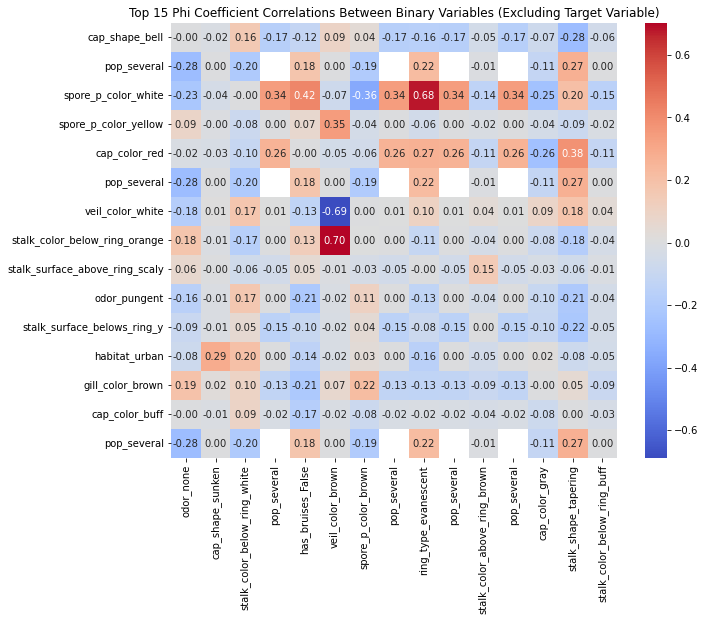

In [86]:
def phi_coefficient(x, y):
    n11 = np.sum((x == 1) & (y == 1))
    n10 = np.sum((x == 1) & (y == 0))
    n01 = np.sum((x == 0) & (y == 1))
    n00 = np.sum((x == 0) & (y == 0))
    
    # Handling division by zero:
    if (n11 + n10) * (n11 + n01) * (n10 + n00) * (n01 + n00) == 0:
        return np.nan
    
    phi = (n11 * n00 - n10 * n01) / np.sqrt((n11 + n10) * (n11 + n01) * (n10 + n00) * (n01 + n00))
    return phi

# Computing the phi coefficient correlation matrix excluding the target variable:
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if df.columns[i] != 'is_poisonous' and df.columns[j] != 'is_poisonous':  # Exclude 'is_poisonous'
            corr_matrix.iloc[i, j] = phi_coefficient(df.iloc[:, i], df.iloc[:, j])
            corr_matrix.iloc[j, i] = corr_matrix.iloc[i, j]

# Extracting the top N correlations:
top_corr = (corr_matrix.abs().unstack().sort_values(kind="quicksort").drop_duplicates())[1:16]

# Extracting the variable pairs from the index:
top_corr_index = [pair for pair in top_corr.index]

# Extracting variables from MultiIndex:
variable1 = [pair[0] for pair in top_corr_index]
variable2 = [pair[1] for pair in top_corr_index]

# Creating a heatmap for the top correlations:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[variable1, variable2], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 15 Phi Coefficient Correlations Between Binary Variables (Excluding Target Variable)")
plt.show()